In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #plot
import seaborn as sns #plot

scadaDataPath="/content/drive/MyDrive/Colab Notebooks/scada_data.csv"
statusDataPath="/content/drive/MyDrive/Colab Notebooks/status_data.csv"
faultDataPath="/content/drive/MyDrive/Colab Notebooks/fault_data.csv"

scadaData = pd.read_csv(scadaDataPath)
statusData = pd.read_csv(statusDataPath)
faultData = pd.read_csv(faultDataPath)

scadaData

DateTime        Time  Error  WEC: ava. windspeed  \
0       5/1/2014 0:00  1398920448      0                  6.9   
1       5/1/2014 0:09  1398920960      0                  5.3   
2       5/1/2014 0:20  1398921600      0                  5.0   
3       5/1/2014 0:30  1398922240      0                  4.4   
4       5/1/2014 0:39  1398922752      0                  5.7   
...               ...         ...    ...                  ...   
49022  4/8/2015 23:20  1428553216      0                  3.9   
49023  4/8/2015 23:30  1428553856      0                  3.9   
49024  4/8/2015 23:39  1428554368      0                  4.2   
49025  4/8/2015 23:50  1428555008      0                  4.1   
49026   4/9/2015 0:00  1428555648      0                  4.8   

       WEC: max. windspeed  WEC: min. windspeed  WEC: ava. Rotation  \
0                      9.4                  2.9                0.00   
1                      8.9                  1.6                0.00   
2                      9.5                  1.4                0.00   
3                      8.3                  1.3                0.00   
4                      9.7                  1.2                0.00   
...                    ...                  ...                 ...   
49022                  5.5                  2.2                6.75   
49023                  5.6                  2.9                6.64   
49024                  6.7                  2.6                7.18   
49025                  6.6                  2.7                7.02   
49026                  6.0                  3.3                8.39   

       WEC: max. Rotation  WEC: min. Rotation  WEC: ava. Power  ...  \
0                    0.02                0.00                0  ...   
1                    0.01                0.00                0  ...   
2                    0.04                0.00                0  ...   
3                    0.08                0.00                0  ...   
4                    0.05                0.00                0  ...   
...                   ...                 ...              ...  ...   
49022                7.40                6.01              147  ...   
49023                7.06                6.33              128  ...   
49024                8.83                6.22              163  ...   
49025                7.94                6.20              160  ...   
49026                9.48                7.14              284  ...   

       Rectifier cabinet temp.  Yaw inverter cabinet temp.  \
0                           24                          20   
1                           24                          20   
2                           24                          20   
3                           23                          21   
4                           23                          21   
...                        ...                         ...   
49022                       33                          23   
49023                       34                          23   
49024                       34                          23   
49025                       33                          23   
49026                       33                          22   

       Fan inverter cabinet temp.  Ambient temp.  Tower temp.  \
0                              25             12           14   
1                              25             12           14   
2                              25             12           14   
3                              25             12           14   
4                              25             12           14   
...                           ...            ...          ...   
49022                          28              9           17   
49023                          28              9           17   
49024                          28              9           18   
49025                          28              9           17   
49026                          28              9           17   



In [ ]:
for column in scadaData.columns:
  print(column, end='\n')

DateTime
Time
Error
WEC: ava. windspeed
WEC: max. windspeed
WEC: min. windspeed
WEC: ava. Rotation
WEC: max. Rotation
WEC: min. Rotation
WEC: ava. Power
WEC: max. Power
WEC: min. Power
WEC: ava. Nacel position including cable twisting
WEC: Operating Hours
WEC: Production kWh
WEC: Production minutes
WEC: ava. reactive Power
WEC: max. reactive Power
WEC: min. reactive Power
WEC: ava. available P from wind
WEC: ava. available P technical reasons
WEC: ava. Available P force majeure reasons
WEC: ava. Available P force external reasons
WEC: ava. blade angle A
Sys 1 inverter 1 cabinet temp.
Sys 1 inverter 2 cabinet temp.
Sys 1 inverter 3 cabinet temp.
Sys 1 inverter 4 cabinet temp.
Sys 1 inverter 5 cabinet temp.
Sys 1 inverter 6 cabinet temp.
Sys 1 inverter 7 cabinet temp.
Sys 2 inverter 1 cabinet temp.
Sys 2 inverter 2 cabinet temp.
Sys 2 inverter 3 cabinet temp.
Sys 2 inverter 4 cabinet temp.
Sys 2 inverter 5 cabinet temp.
Sys 2 inverter 6 cabinet temp.
Sys 2 inverter 7 cabinet temp.
Spinne

In [ ]:
print(scadaData.dtypes.value_counts(), scadaData.dtypes, sep="\n\n")

int64      56
float64     9
object      1
dtype: int64

DateTime                  object
Time                       int64
Error                      int64
WEC: ava. windspeed      float64
WEC: max. windspeed      float64
                          ...   
Control cabinet temp.      int64
Transformer temp.          int64
RTU: ava. Setpoint 1       int64
Inverter averages        float64
Inverter std dev         float64
Length: 66, dtype: object


In [ ]:
scadaData.DateTime = pd.to_datetime(scadaData.DateTime)
print(scadaData.dtypes.value_counts())

int64             56
float64            9
datetime64[ns]     1
dtype: int64


In [ ]:
statusData

Time  Main Status  Sub Status Full Status  \
0     24/04/2014 12:37:38            0           0       0 : 0   
1     25/04/2014 19:27:24           71         104    71 : 104   
2     26/04/2014 09:30:13            8           0       8 : 0   
3     26/04/2014 10:05:19            8           0       8 : 0   
4     26/04/2014 10:05:25            8           0       8 : 0   
...                   ...          ...         ...         ...   
1844  27/04/2015 07:26:51            0           0       0 : 0   
1845  28/04/2015 22:14:25           26         373    26 : 373   
1846  28/04/2015 22:14:53            0           2       0 : 2   
1847  28/04/2015 22:17:15            0           1       0 : 1   
1848  28/04/2015 22:18:19            0           0       0 : 0   

                                            Status Text  T  Service  FaultMsg  \
0                                  Turbine in operation  1    False     False   
1     Insulation monitoring : Insulation fault Phase U2  6    False      True   
2                                           Maintenance  6     True     False   
3                                           Maintenance  6    False     False   
4                                           Maintenance  6     True     False   
...                                                 ... ..      ...       ...   
1844                               Turbine in operation  1    False     False   
1845  Malfunction fan-inverter : Other control board...  6    False     False   
1846                                Turbine operational  1    False     False   
1847                                   Turbine starting  1    False     False   
1848                               Turbine in operation  1    False     False   

      Value0  
0      7.400  
1     20.500  
2     17.100  
3      8.700  
4     10.600  
...      ...  
1844   7.000  
1845   8.100  
1846   9.500  
1847  11.100  
1848  11.500  

[1849 rows x 9 columns]

In [ ]:
print(statusData.dtypes.value_counts(), statusData.dtypes, sep="\n\n")

object     3
int64      3
bool       2
float64    1
dtype: int64

Time            object
Main Status      int64
Sub Status       int64
Full Status     object
Status Text     object
T                int64
Service           bool
FaultMsg          bool
Value0         float64
dtype: object


In [ ]:
statusData.select_dtypes(include=['object'])

Time Full Status  \
0     24/04/2014 12:37:38       0 : 0   
1     25/04/2014 19:27:24    71 : 104   
2     26/04/2014 09:30:13       8 : 0   
3     26/04/2014 10:05:19       8 : 0   
4     26/04/2014 10:05:25       8 : 0   
...                   ...         ...   
1844  27/04/2015 07:26:51       0 : 0   
1845  28/04/2015 22:14:25    26 : 373   
1846  28/04/2015 22:14:53       0 : 2   
1847  28/04/2015 22:17:15       0 : 1   
1848  28/04/2015 22:18:19       0 : 0   

                                            Status Text  
0                                  Turbine in operation  
1     Insulation monitoring : Insulation fault Phase U2  
2                                           Maintenance  
3                                           Maintenance  
4                                           Maintenance  
...                                                 ...  
1844                               Turbine in operation  
1845  Malfunction fan-inverter : Other control board...  
1846                                Turbine operational  
1847                                   Turbine starting  
1848                               Turbine in operation  

[1849 rows x 3 columns]

object is the default container capable of holding strings, or any combination of dtypes.

In [ ]:
statusData.Time = pd.to_datetime(statusData.Time)
statusData.rename(columns = {'Time':'DateTime'}, inplace = True)
print(statusData.dtypes.value_counts(), statusData.dtypes, sep="\n\n")

int64             3
object            2
bool              2
datetime64[ns]    1
float64           1
dtype: int64

DateTime       datetime64[ns]
Main Status             int64
Sub Status              int64
Full Status            object
Status Text            object
T                       int64
Service                  bool
FaultMsg                 bool
Value0                float64
dtype: object


In [ ]:
faultData

DateTime           Time Fault
0    2014-05-14 14:39:44 1400096384.000    GF
1    2014-05-14 14:50:24 1400097024.000    GF
2    2014-05-14 14:58:56 1400097536.000    GF
3    2014-05-14 15:09:36 1400098176.000    GF
4    2014-05-14 15:20:16 1400098816.000    GF
..                   ...            ...   ...
548  2015-01-14 23:00:48 1421298048.000    AF
549  2015-01-14 23:09:20 1421298560.000    AF
550  2015-01-15 22:50:08 1421383808.000    AF
551  2015-01-15 23:00:48 1421384448.000    AF
552  2015-01-15 23:09:20 1421384960.000    AF

[553 rows x 3 columns]

In [ ]:
print(faultData.dtypes.value_counts(), faultData.dtypes, sep="\n\n")

object     2
float64    1
dtype: int64

DateTime     object
Time        float64
Fault        object
dtype: object


In [ ]:
faultData.DateTime = pd.to_datetime(faultData.DateTime)

print(faultData.dtypes.value_counts(), faultData.dtypes, sep="\n\n")

datetime64[ns]    1
float64           1
object            1
dtype: int64

DateTime    datetime64[ns]
Time               float64
Fault               object
dtype: object


In [ ]:
faultData.Fault.value_counts()

FF    254
EF    174
AF     62
GF     43
MF     20
Name: Fault, dtype: int64

*   FF: feeding fault   
*   EF: excitation fault
*   AF: air cooling fault
*   GF: generator heating fault
*   MF: mains failure fault

[Source](https://github.com/lkev/wt-fdd)

FF (Feeding Fault): es una falla en el suministro eléctrico de la turbina. Puede ocurrir debido a un cortocircuito o una sobrecarga en la línea de alimentación.

EF (Excitation Fault): es una falla en el sistema de excitación del generador de la turbina eólica. Esto puede llevar a una pérdida de potencia en la salida del generador y, por lo tanto, reducir la eficiencia de la turbina.

AF (Air Cooling Fault): es una falla en el sistema de enfriamiento por aire de la turbina eólica. Si la temperatura del generador aumenta demasiado debido a la falta de enfriamiento, puede provocar un fallo en el sistema.

GF (Generator Heating Fault): es una falla en el sistema de calentamiento del generador de la turbina. Si el generador no se calienta adecuadamente en condiciones frías, puede provocar un fallo en el sistema.

MF (Mains Failure Fault): es una falla en el suministro eléctrico externo a la turbina eólica. Si se produce una interrupción en la red eléctrica, la turbina debe desconectarse automáticamente para evitar daños en el equipo.

# 2. Time Series Analysis

(0.5, 3.5)

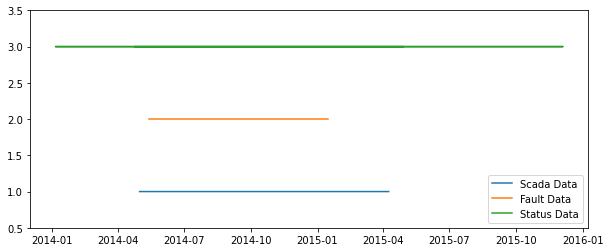

In [ ]:
# Plot time span of all data

timeScada = scadaData.DateTime
timeFault = faultData.DateTime
timeStatus = statusData.DateTime

plt.figure(figsize=(10,4))
plt.plot(timeScada, np.full(len(scadaData), 1), label='Scada Data')
plt.plot(timeFault, np.full(len(faultData), 2), label='Fault Data')
plt.plot(timeStatus, np.full(len(statusData), 3), label='Status Data')
plt.legend(loc='lower right')
plt.ylim(0.5, 3.5)

<AxesSubplot:xlabel='DateTime'>

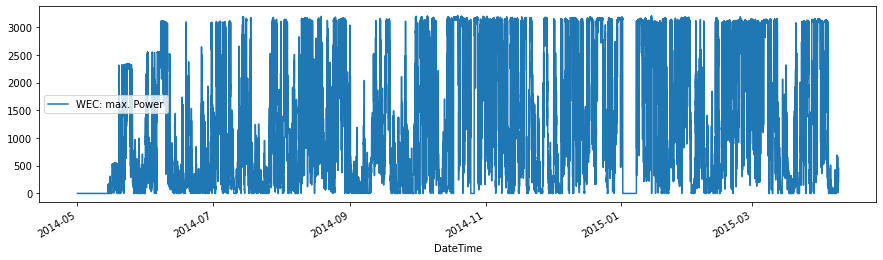

In [ ]:
# Plot of max power from SCADA data
scadaData.plot(x='DateTime', y='WEC: max. Power', figsize=(15,4))

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


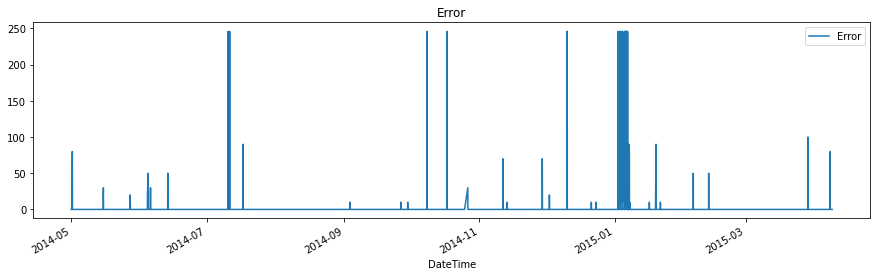

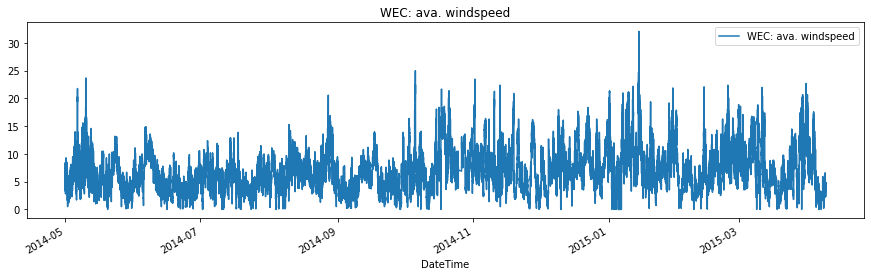

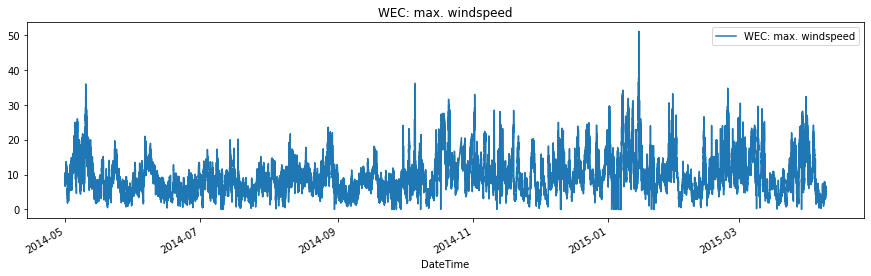

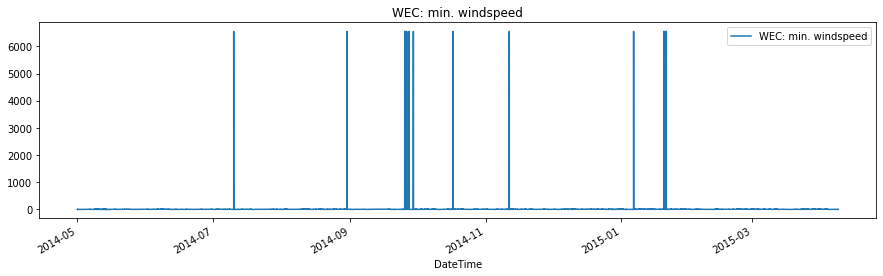

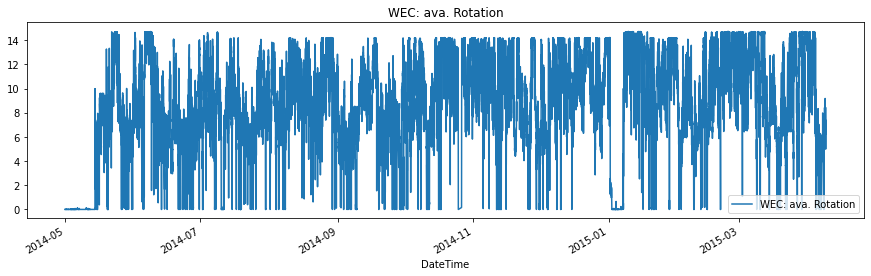

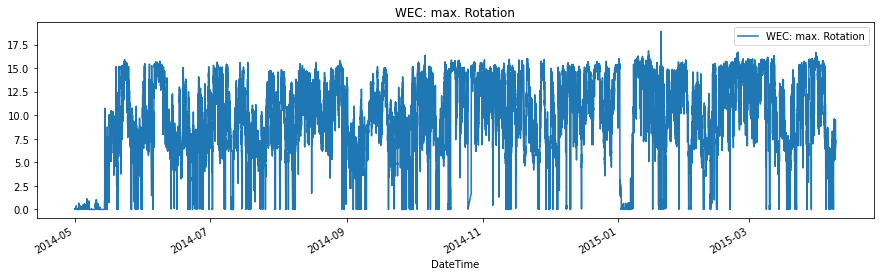

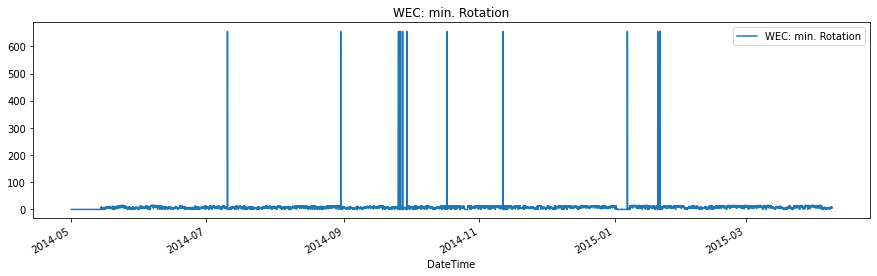

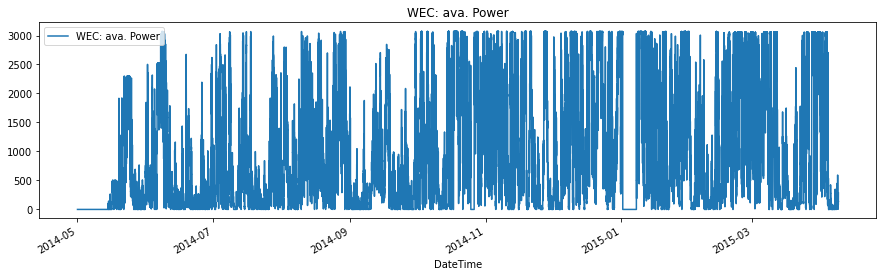

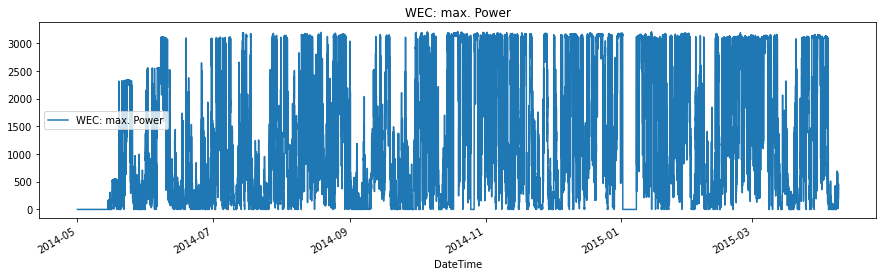

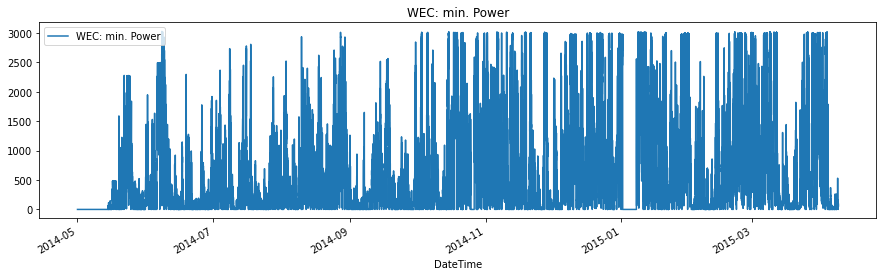

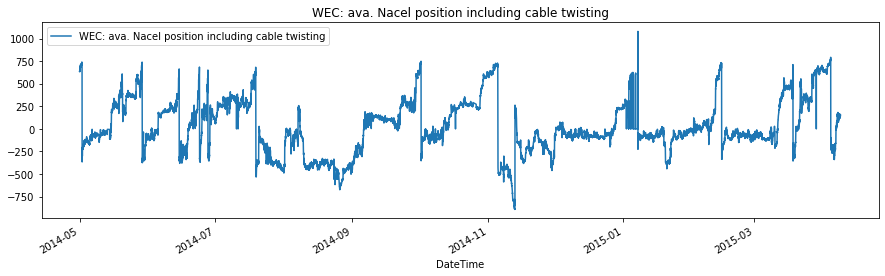

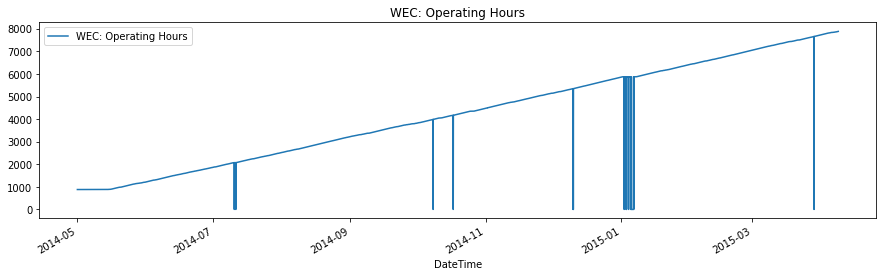

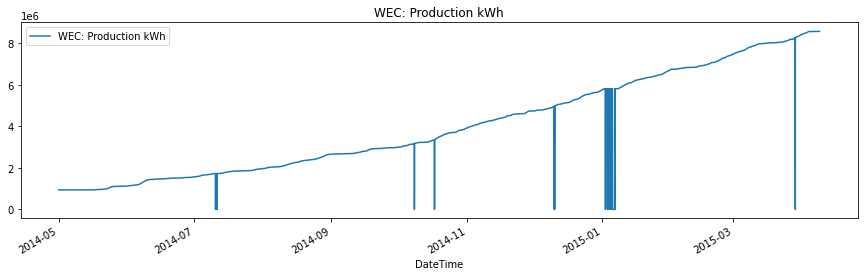

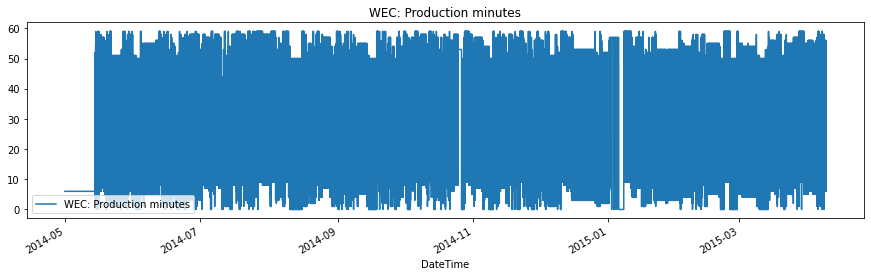

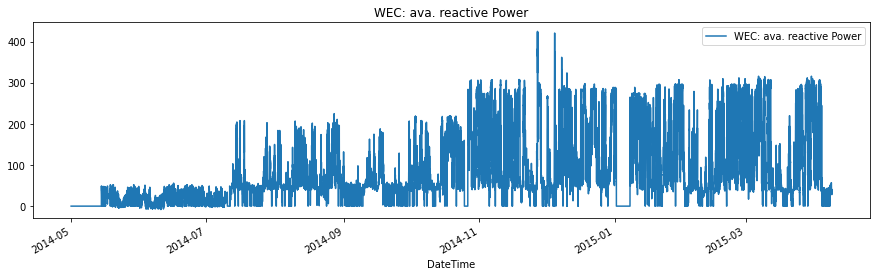

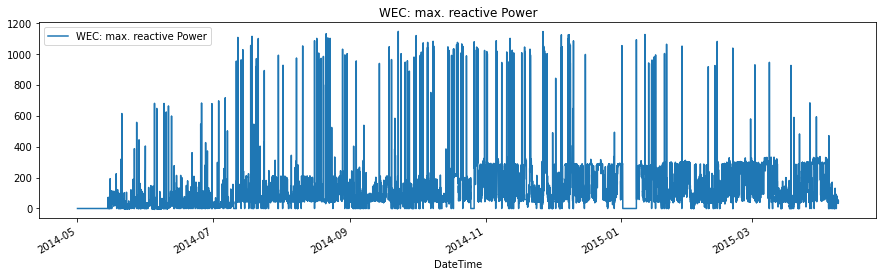

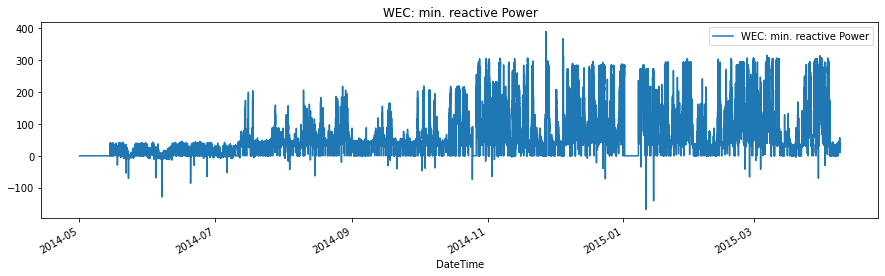

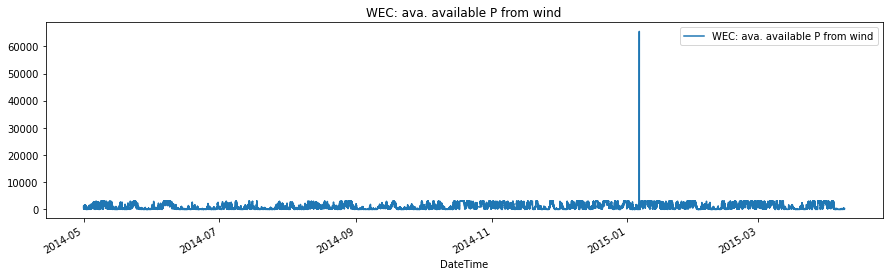

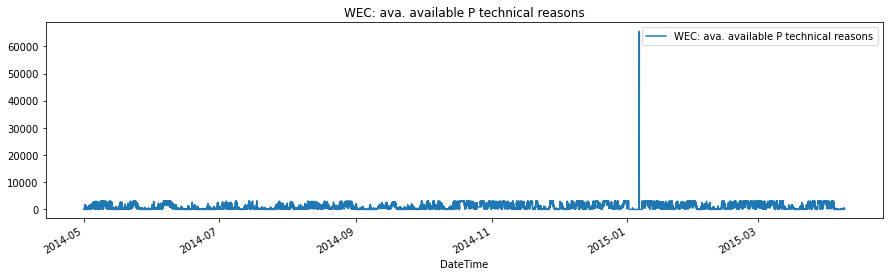

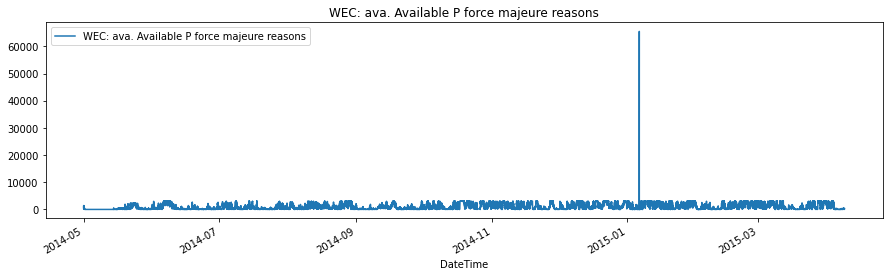

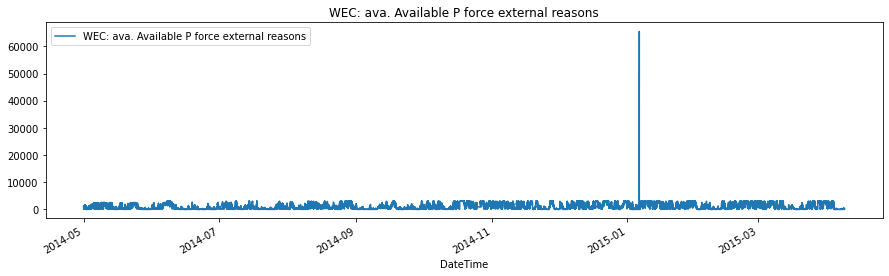

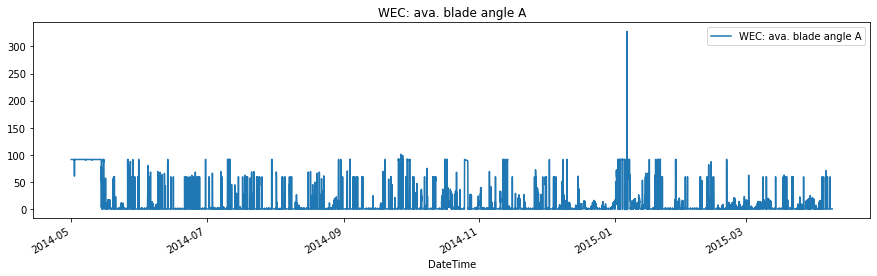

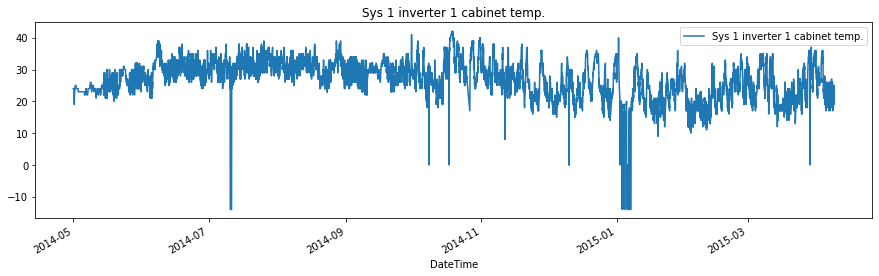

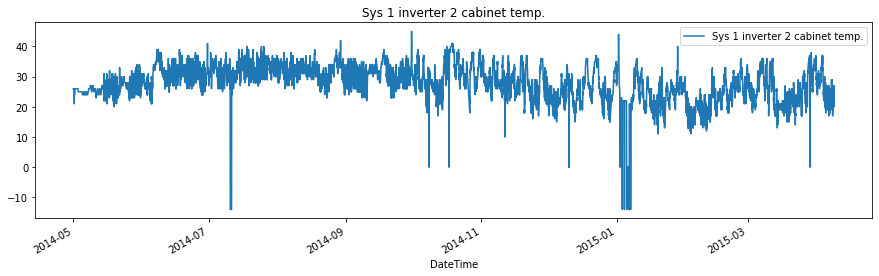

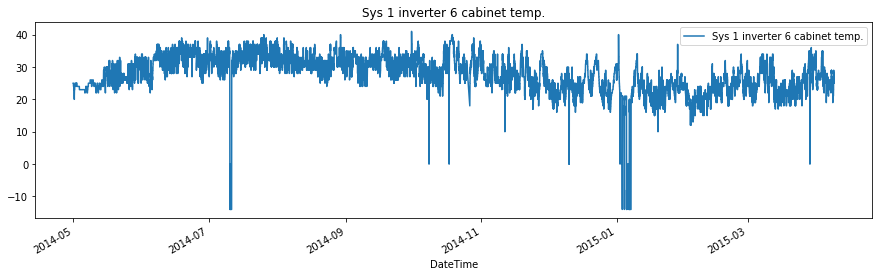

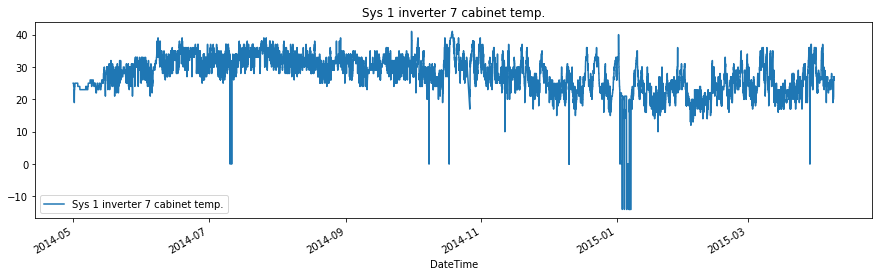

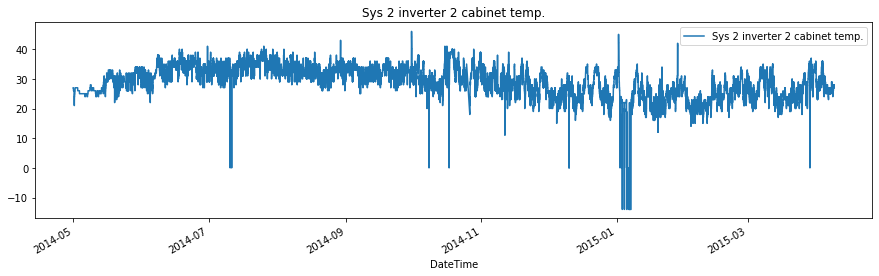

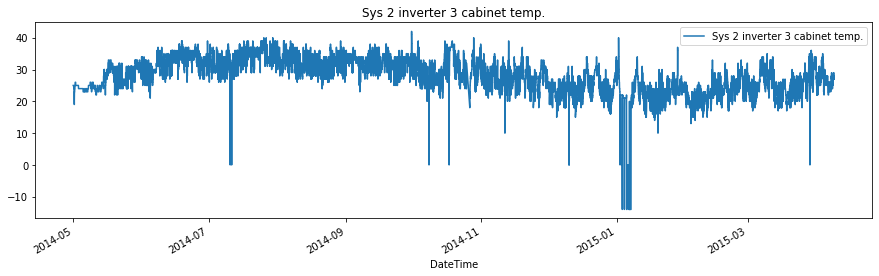

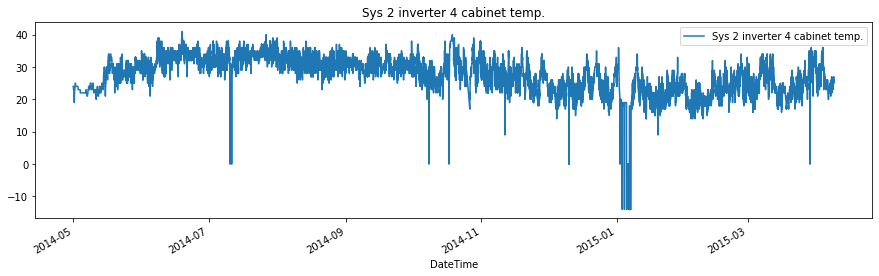

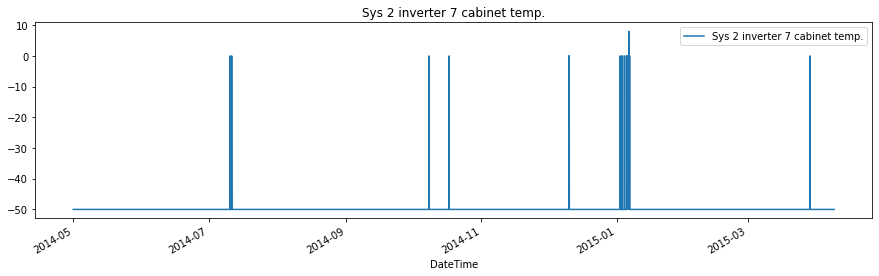

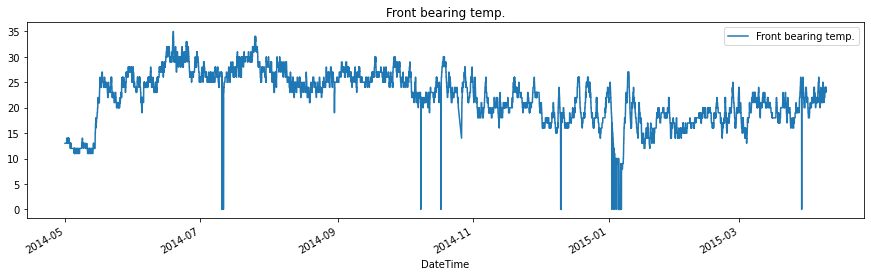

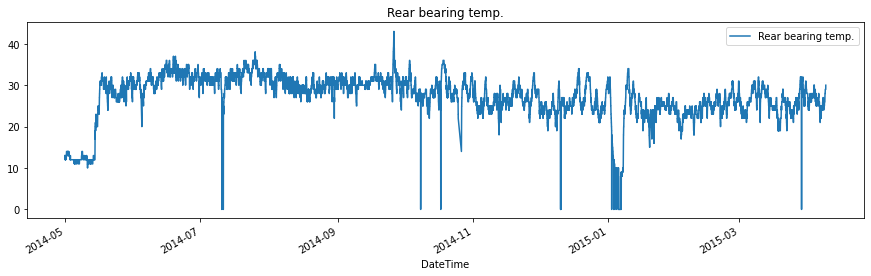

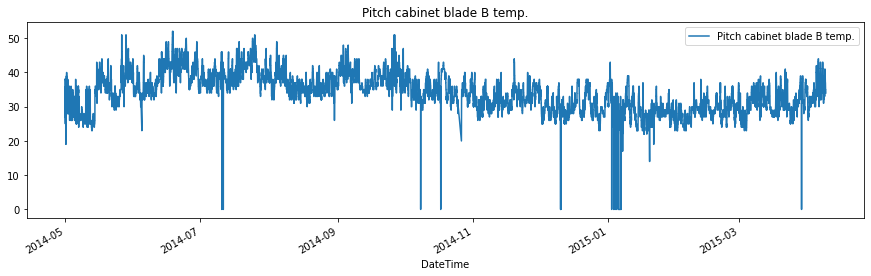

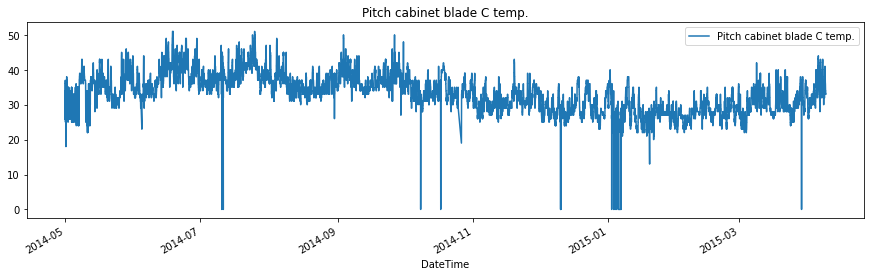

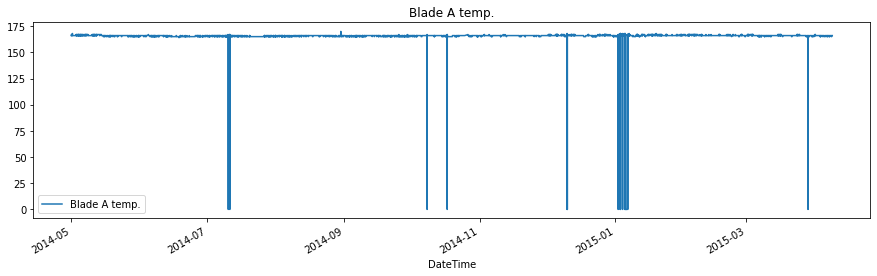

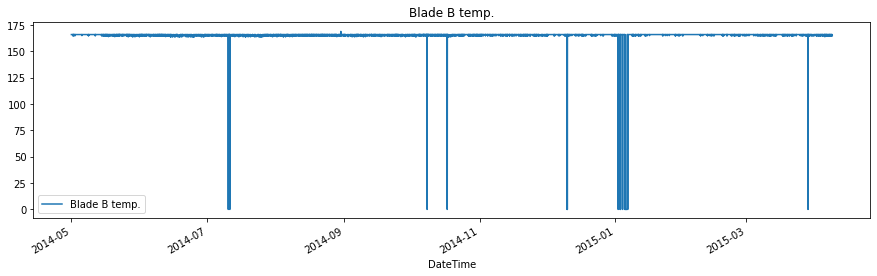

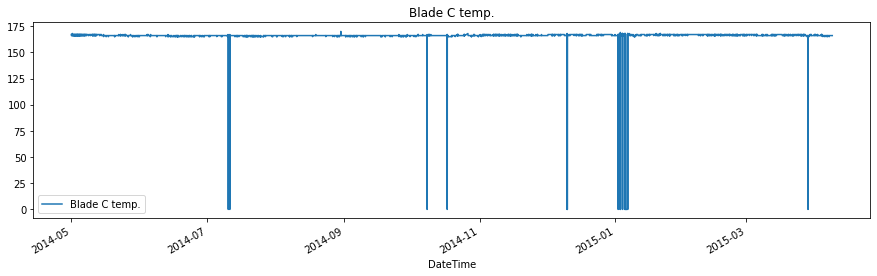

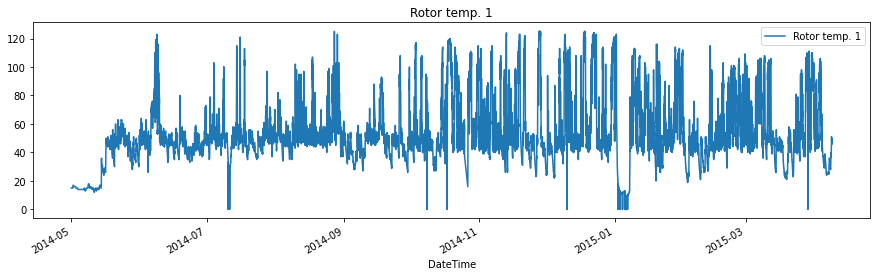

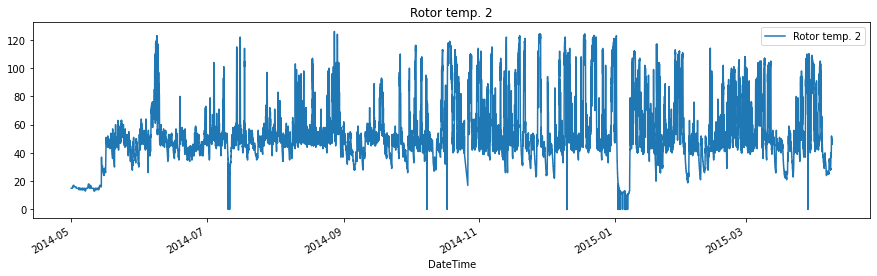

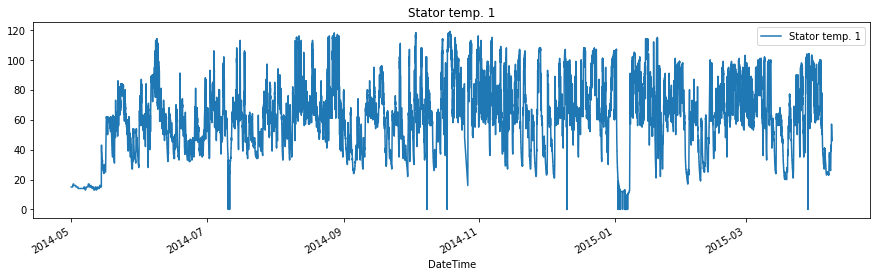

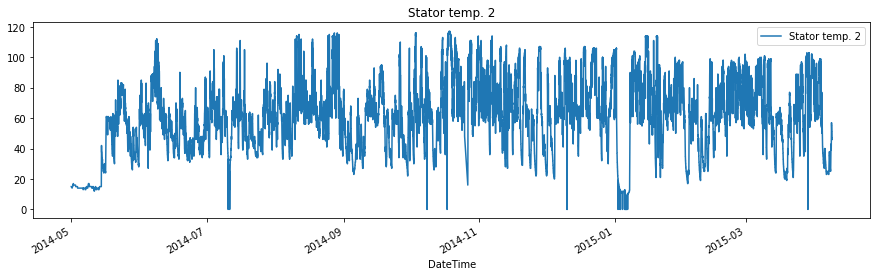

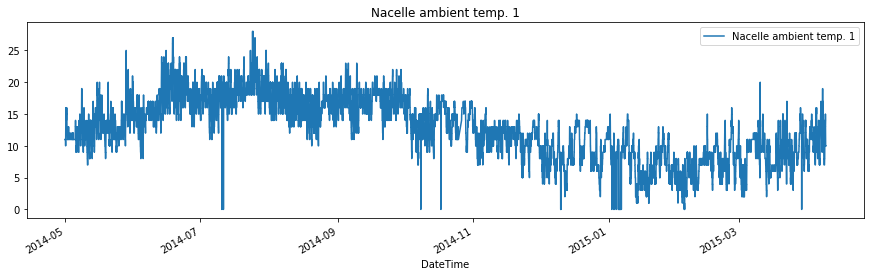

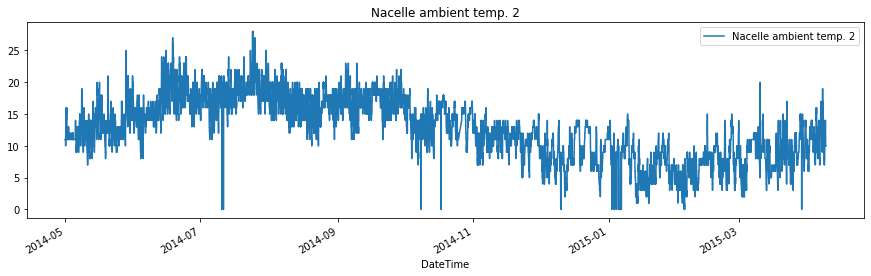

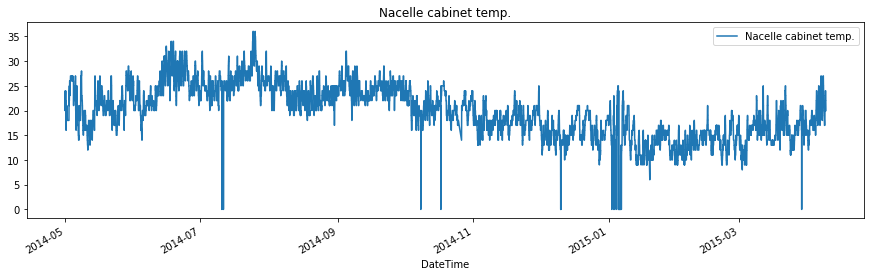

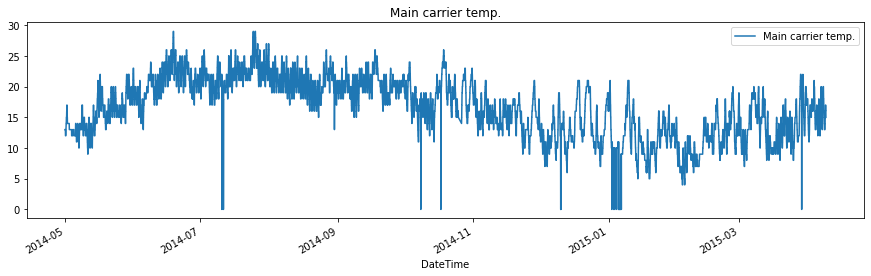

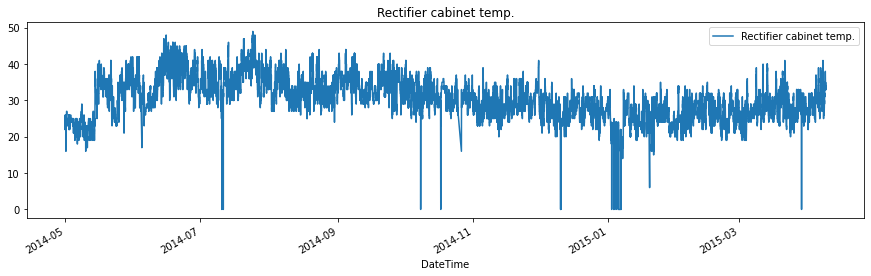

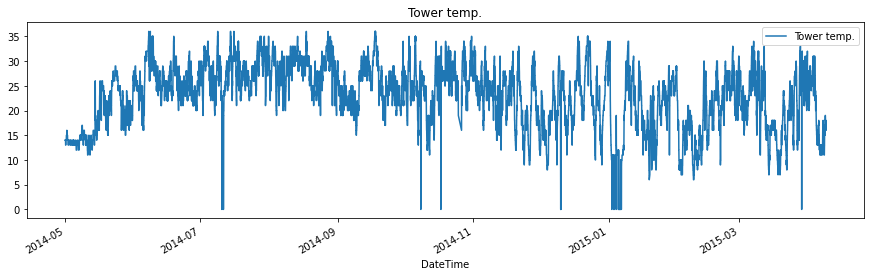

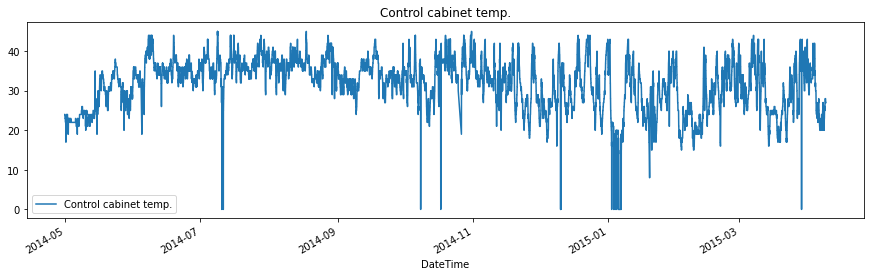

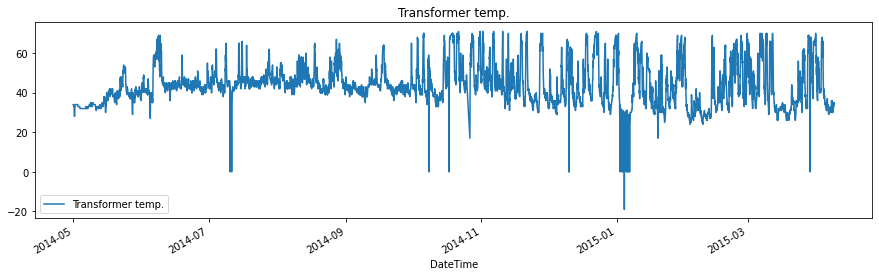

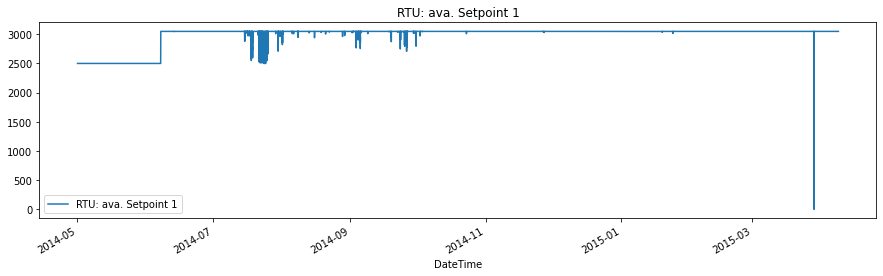

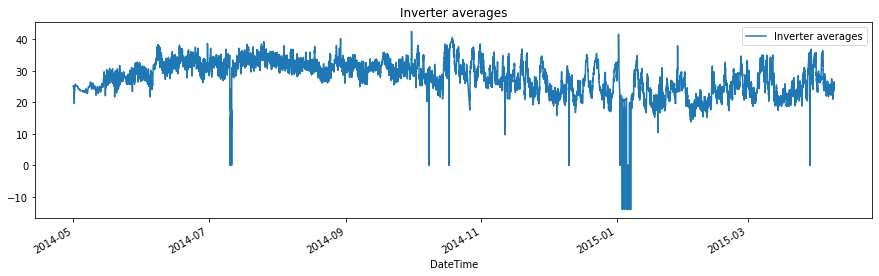

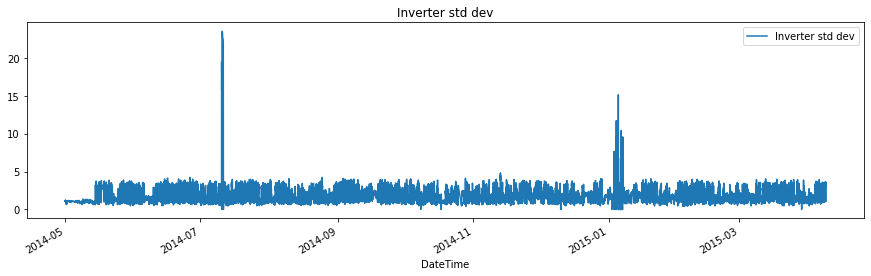

In [ ]:
tempColumnsArr = scadaData.columns.tolist()
tempColumnsArr.remove('DateTime')
tempColumnsArr.remove('Time')
scadaData['DateTime'] = pd.to_datetime(scadaData['DateTime'])
for column in tempColumnsArr:
  scadaData.plot(title=column, x='DateTime', y=column, figsize=(15,4))

<AxesSubplot:xlabel='DateTime'>

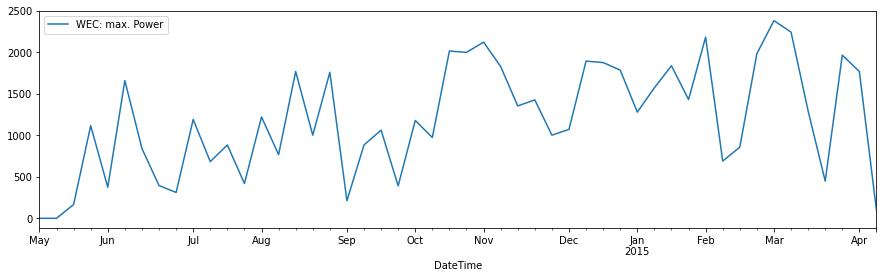

In [ ]:
# Plot of max power on weekly resampled data
scadaData['DateTime'] = pd.to_datetime(scadaData['DateTime'])
scadaData.resample('W', on='DateTime').mean().plot(y='WEC: max. Power', figsize=(15,4))

<AxesSubplot:xlabel='DateTime'>

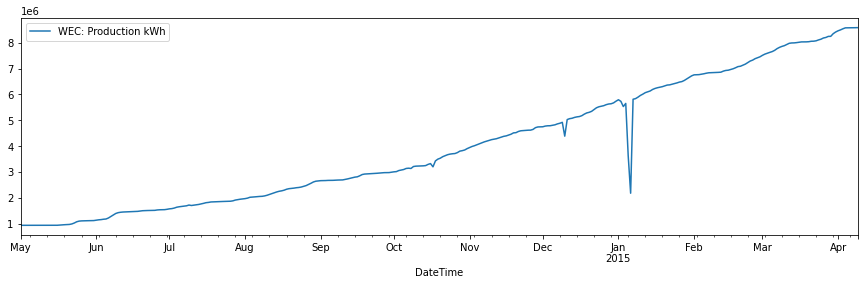

In [ ]:
# Plot of power production on monthly resampled data
scadaData.resample('D', on='DateTime').mean().plot(y='WEC: Production kWh', figsize=(15,4))

<AxesSubplot:xlabel='DateTime'>

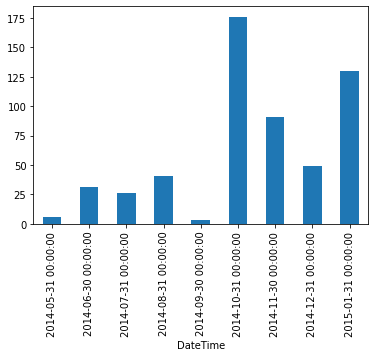

In [ ]:
# Plot of number of faults on monthly resampled data
faultData['DateTime'] = pd.to_datetime(faultData['DateTime'])
faultData.resample('M', on='DateTime').Fault.count().plot.bar()

In [ ]:
print("There is", len(faultData.Fault.unique()), "different types of fault values...", sep=' ')

There is 5 different types of fault values...


<AxesSubplot:title={'center':'Wind Turbine Faults'}, xlabel='DateTime', ylabel='Fault Counts'>

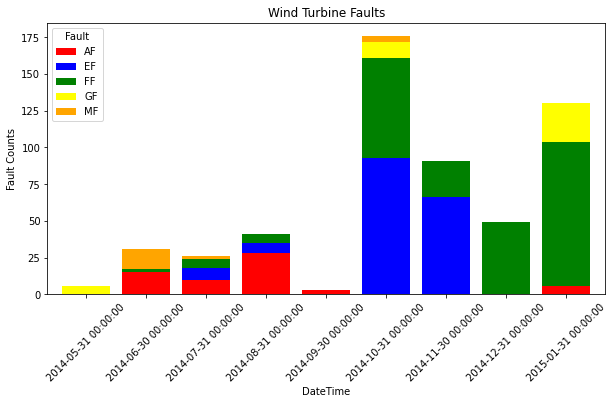

In [ ]:
# Diferenciar los tipos de faltas con un bar plot

colorsName = ["red", "blue", "green", "yellow", "orange"]

faultData.resample('M', on='DateTime').Fault.value_counts().unstack().plot.bar(
    stacked=True, width=0.8, figsize=(10,5), color=colorsName, rot=45, 
    title='Wind Turbine Faults', ylabel='Fault Counts')

# 3. Combine Scada & Fault Data

In [ ]:
#Check column names in common

scadaColumns = scadaData.columns.tolist()
faultColumns = faultData.columns.tolist()

innerjoin = list(set(scadaColumns) & set(faultColumns))
innerjoin

['DateTime', 'Time']

In [ ]:
#Time is the most concrete column

combinedData = scadaData.merge(faultData, on='Time', how='outer') #how = join types
combinedData

DateTime_x        Time  Error  WEC: ava. windspeed  \
0     2014-05-01 00:00:00  1398920448      0                  6.9   
1     2014-05-01 00:09:00  1398920960      0                  5.3   
2     2014-05-01 00:20:00  1398921600      0                  5.0   
3     2014-05-01 00:30:00  1398922240      0                  4.4   
4     2014-05-01 00:39:00  1398922752      0                  5.7   
...                   ...         ...    ...                  ...   
49129 2015-04-08 23:20:00  1428553216      0                  3.9   
49130 2015-04-08 23:30:00  1428553856      0                  3.9   
49131 2015-04-08 23:39:00  1428554368      0                  4.2   
49132 2015-04-08 23:50:00  1428555008      0                  4.1   
49133 2015-04-09 00:00:00  1428555648      0                  4.8   

       WEC: max. windspeed  WEC: min. windspeed  WEC: ava. Rotation  \
0                      9.4                  2.9                0.00   
1                      8.9                  1.6                0.00   
2                      9.5                  1.4                0.00   
3                      8.3                  1.3                0.00   
4                      9.7                  1.2                0.00   
...                    ...                  ...                 ...   
49129                  5.5                  2.2                6.75   
49130                  5.6                  2.9                6.64   
49131                  6.7                  2.6                7.18   
49132                  6.6                  2.7                7.02   
49133                  6.0                  3.3                8.39   

       WEC: max. Rotation  WEC: min. Rotation  WEC: ava. Power  ...  \
0                    0.02                0.00                0  ...   
1                    0.01                0.00                0  ...   
2                    0.04                0.00                0  ...   
3                    0.08                0.00                0  ...   
4                    0.05                0.00                0  ...   
...                   ...                 ...              ...  ...   
49129                7.40                6.01              147  ...   
49130                7.06                6.33              128  ...   
49131                8.83                6.22              163  ...   
49132                7.94                6.20              160  ...   
49133                9.48                7.14              284  ...   

       Fan inverter cabinet temp.  Ambient temp.  Tower temp.  \
0                              25             12           14   
1                              25             12           14   
2                              25             12           14   
3                              25             12           14   
4                              25             12           14   
...                           ...            ...          ...   
49129                          28              9           17   
49130                          28              9           17   
49131                          28              9           18   
49132                          28              9           17   
49133                          28              9           17   

       Control cabinet temp.  Transformer temp.  RTU: ava. Setpoint 1  \
0                         24                 34                  2501   
1                         24                 34                  2501   
2                         24                 34                  2501   
3                         24                 34                  2501   
4                         23                 34                  2501   
...                      ...                ...                   ...   
49129                     27                 35                  3050   
49130                     27                 35                  3050   
49131                     27              

In [ ]:
combinedData['Fault'] = combinedData['Fault'].replace(np.nan, 'NF') #NF = No Fault
combinedData = combinedData.drop('DateTime_y', axis=1)
combinedData.rename(columns = {'DateTime_x':'DateTime'}, inplace = True)

combinedData

DateTime        Time  Error  WEC: ava. windspeed  \
0     2014-05-01 00:00:00  1398920448      0                  6.9   
1     2014-05-01 00:09:00  1398920960      0                  5.3   
2     2014-05-01 00:20:00  1398921600      0                  5.0   
3     2014-05-01 00:30:00  1398922240      0                  4.4   
4     2014-05-01 00:39:00  1398922752      0                  5.7   
...                   ...         ...    ...                  ...   
49129 2015-04-08 23:20:00  1428553216      0                  3.9   
49130 2015-04-08 23:30:00  1428553856      0                  3.9   
49131 2015-04-08 23:39:00  1428554368      0                  4.2   
49132 2015-04-08 23:50:00  1428555008      0                  4.1   
49133 2015-04-09 00:00:00  1428555648      0                  4.8   

       WEC: max. windspeed  WEC: min. windspeed  WEC: ava. Rotation  \
0                      9.4                  2.9                0.00   
1                      8.9                  1.6                0.00   
2                      9.5                  1.4                0.00   
3                      8.3                  1.3                0.00   
4                      9.7                  1.2                0.00   
...                    ...                  ...                 ...   
49129                  5.5                  2.2                6.75   
49130                  5.6                  2.9                6.64   
49131                  6.7                  2.6                7.18   
49132                  6.6                  2.7                7.02   
49133                  6.0                  3.3                8.39   

       WEC: max. Rotation  WEC: min. Rotation  WEC: ava. Power  ...  \
0                    0.02                0.00                0  ...   
1                    0.01                0.00                0  ...   
2                    0.04                0.00                0  ...   
3                    0.08                0.00                0  ...   
4                    0.05                0.00                0  ...   
...                   ...                 ...              ...  ...   
49129                7.40                6.01              147  ...   
49130                7.06                6.33              128  ...   
49131                8.83                6.22              163  ...   
49132                7.94                6.20              160  ...   
49133                9.48                7.14              284  ...   

       Yaw inverter cabinet temp.  Fan inverter cabinet temp.  Ambient temp.  \
0                              20                          25             12   
1                              20                          25             12   
2                              20                          25             12   
3                              21                          25             12   
4                              21                          25             12   
...                           ...                         ...            ...   
49129                          23                          28              9   
49130                          23                          28              9   
49131                          23                          28              9   
49132                          23                          28              9   
49133                          22                          28              9   

       Tower temp.  Control cabinet temp.  Transformer temp.  \
0               14                     24                 34   
1               14                     24                 34   
2               14                     24                 34   
3               14                     24                 34   
4               14                     23                 34   
...            ...                    ...                ...   
49129           17                     27                 35   
49130    

# 4. Exploratory Data Analysis (EDA)

## 4.1 Check Null Data

In [ ]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

get_numerical_summary(combinedData)
nullInfo = combinedData.isnull().sum()
nullInfo[nullInfo > 0]

Series([], dtype: int64)

In [ ]:
#combinedData.info()
#pd.set_option("display.max_columns" , None)
obj = pd.isnull(combinedData).sum()
for key,value in obj.iteritems():
  if value != 0:
    print(key,",",value)

No null values...

## 4.2 Individual Column Analysis

In [ ]:
for column in combinedData.columns:
  print(column)

DateTime
Time
Error
WEC: ava. windspeed
WEC: max. windspeed
WEC: min. windspeed
WEC: ava. Rotation
WEC: max. Rotation
WEC: min. Rotation
WEC: ava. Power
WEC: max. Power
WEC: min. Power
WEC: ava. Nacel position including cable twisting
WEC: Operating Hours
WEC: Production kWh
WEC: Production minutes
WEC: ava. reactive Power
WEC: max. reactive Power
WEC: min. reactive Power
WEC: ava. available P from wind
WEC: ava. available P technical reasons
WEC: ava. Available P force majeure reasons
WEC: ava. Available P force external reasons
WEC: ava. blade angle A
Sys 1 inverter 1 cabinet temp.
Sys 1 inverter 2 cabinet temp.
Sys 1 inverter 3 cabinet temp.
Sys 1 inverter 4 cabinet temp.
Sys 1 inverter 5 cabinet temp.
Sys 1 inverter 6 cabinet temp.
Sys 1 inverter 7 cabinet temp.
Sys 2 inverter 1 cabinet temp.
Sys 2 inverter 2 cabinet temp.
Sys 2 inverter 3 cabinet temp.
Sys 2 inverter 4 cabinet temp.
Sys 2 inverter 5 cabinet temp.
Sys 2 inverter 6 cabinet temp.
Sys 2 inverter 7 cabinet temp.
Spinne

We can drop irrelevant features. We can drop **datetime, time, and error** (since the column 'Error' does not have any effect on the data) columns. Next, features that "de facto" are output of wind turbine, such as **power from wind, operating hours, and kWh production**, are dropped. Also, climatic variable such as **wind speed** are not useful. That features can be dropped.

The scope will be the features related to the temperatures of the wind turbine components.

In [ ]:
# Drop irrelevant features
columnsToDrop = ['DateTime', 
                 'Time', 
                 'Error', 
                 'WEC: ava. windspeed', 
                 'WEC: max. windspeed', 
                 'WEC: min. windspeed',
                 'WEC: ava. available P from wind',
                 'WEC: ava. available P technical reasons', 
                 'WEC: ava. Available P force majeure reasons',
                 'WEC: ava. Available P force external reasons',
                 'WEC: Operating Hours', 
                 'WEC: Production kWh',
                 'WEC: ava. Nacel position including cable twisting',
                 'WEC: Production minutes', 

                 "RTU: ava. Setpoint 1", 

                 'WEC: ava. Nacel position including cable twisting',
                 'WEC: ava. reactive Power', 
                 'WEC: max. reactive Power',
                  'WEC: min. reactive Power', 
                 'WEC: ava. blade angle A' 
                 ]


combinedData = combinedData.drop(columns = columnsToDrop)
combinedData.columns

Index(['WEC: ava. Rotation', 'WEC: max. Rotation', 'WEC: min. Rotation',
       'WEC: ava. Power', 'WEC: max. Power', 'WEC: min. Power',
       'Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 2 cabinet temp.',
       'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 4 cabinet temp.',
       'Sys 1 inverter 5 cabinet temp.', 'Sys 1 inverter 6 cabinet temp.',
       'Sys 1 inverter 7 cabinet temp.', 'Sys 2 inverter 1 cabinet temp.',
       'Sys 2 inverter 2 cabinet temp.', 'Sys 2 inverter 3 cabinet temp.',
       'Sys 2 inverter 4 cabinet temp.', 'Sys 2 inverter 5 cabinet temp.',
       'Sys 2 inverter 6 cabinet temp.', 'Sys 2 inverter 7 cabinet temp.',
       'Spinner temp.', 'Front bearing temp.', 'Rear bearing temp.',
       'Pitch cabinet blade A temp.', 'Pitch cabinet blade B temp.',
       'Pitch cabinet blade C temp.', 'Blade A temp.', 'Blade B temp.',
       'Blade C temp.', 'Rotor temp. 1', 'Rotor temp. 2', 'Stator temp. 1',
       'Stator temp. 2', 'Nacelle ambient temp. 1', 

Remember that;
- FF: feeding fault
- EF: excitation fault
- AF: air cooling fault
- GF: generator heating fault
- MF: mains failure fault
- NF: not fault

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Suppress scientific notations
dataSummary = combinedData.groupby('Fault').aggregate(['mean', 'min', 'max']).T #transpose
pd.set_option('display.max_rows', None)
dataSummary

Fault                                     AF       EF       FF      GF  \
WEC: ava. Rotation             mean    7.382   12.074    7.486   9.068   
                               min     0.390    2.050    0.000   0.160   
                               max    14.690   14.210   14.210  10.000   
WEC: max. Rotation             mean   10.974   15.078    9.624  10.235   
                               min     0.800    3.360    0.040   1.680   
                               max    15.300   16.030   15.810  10.900   
WEC: min. Rotation             mean    6.002    7.230    4.624   7.579   
                               min     0.000    0.000    0.000   0.000   
                               max    13.830   13.880   13.880   9.800   
WEC: ava. Power                mean  803.710 2428.069 1207.335   0.000   
                               min     0.000    0.000    0.000   0.000   
                               max  2835.000 3070.000 3070.000   0.000   
WEC: max. Power                mean 1476.919 3128.213 1698.283   0.000   
                               min     0.000    0.000    0.000   0.000   
                               max  3134.000 3192.000 3187.000   0.000   
WEC: min. Power                mean  491.919 1220.799  581.394   0.000   
                               min     0.000    0.000    0.000   0.000   
                               max  2417.000 3011.000 3011.000   0.000   
Sys 1 inverter 1 cabinet temp. mean   31.242   35.270   30.193  22.070   
                               min    21.000   29.000   20.000  17.000   
                               max    38.000   42.000   42.000  33.000   
Sys 1 inverter 2 cabinet temp. mean   32.339   35.764   31.646  23.186   
                               min    22.000   28.000   21.000  18.000   
                               max    39.000   41.000   44.000  36.000   
Sys 1 inverter 3 cabinet temp. mean   31.677   34.764   30.654  23.093   
                               min    22.000   28.000   20.000  17.000   
                               max    39.000   42.000   43.000  34.000   
Sys 1 inverter 4 cabinet temp. mean   31.984   34.948   30.256  21.837   
                               min    21.000   28.000   21.000  17.000   
                               max    37.000   40.000   41.000  33.000   
Sys 1 inverter 5 cabinet temp. mean   33.274   35.948   31.724  24.512   
                               min    23.000   29.000   21.000  18.000   
                               max    39.000   41.000   45.000  36.000   
Sys 1 inverter 6 cabinet temp. mean   31.871   33.931   29.417  22.140   
                               min    20.000   26.000   20.000  18.000   
                               max    37.000   40.000   40.000  33.000   
Sys 1 inverter 7 cabinet temp. mean   31.468   34.149   29.843  23.791   
                               min    20.000   27.000   19.000  17.000   
                               max    38.000   41.000   40.000  34.000   
Sys 2 inverter 1 cabinet temp. mean   32.694   34.149   30.890  23.209   
                               min    22.000   26.000   20.000  18.000   
                               max    38.000   40.000   45.000  36.000   
Sys 2 inverter 2 cabinet temp. mean   32.242   33.954   30.898  24.279   
                               min    21.000   27.000   19.000  18.000   
                               max    39.000   40.000   45.000  36.000   
Sys 2 inverter 3 cabinet temp. mean   30.677   31.770   28.504  22.465   
                               min    19.000   24.000   18.000  18.000   
                               max    36.000   38.000   40.000  34.000   
Sys 2 inverter 4 cabinet temp. mean   30.468   31.793   27.555  22.116   
                               min    19.000   24.000   18.000  17.000   
                               max    36.000   40.000   39.000  31.000   
Sys 2 inverter 5 cabinet temp. mean  -14.000  -14.000  -14.000 -14.000   
                               min   -14.000  -14.000  -14.000 -14.000   
    

- WF has lower ava, min, max active reactive power than No Fault (NF)
- EF has higher ava, min, max active reactive power than No Fault (NF)
- GF has ZERO ava, min, max active reactive power
- FF and MF have higher nacelle cable twisting than NF
- AF and GF have negative nacelle cable twisting
- AF and MF have lower production
- All faults have higher blade angle, the highest is FF
- GF in general has the lowest temperature in ALL components (cabinet temp, T spinner, T front bearing, ..., T transformer)
- While other faults (FF, AF, MF, EF) have higher temperature
- EF temperature is highest in cabinet, pitch, rotor, stator, ambient, control, tower, and transformer
- AF temperature is highest in spinner, front bearing, rare bearing, nacelle, main carrier, rectifier, yaw, and fan inverter

Como se puede ver hay muchos datos con diferentes escalas, normalizarlos puede mejorar el rendimiento de futuros modelos de aprendizaje automatico, pero antes de eso se debe ver si hay muchos outliers

La columna "Sys 2 inverter 6 cabinet temp." no sirve de nada debido a que todos los valores de sus datos son 0. Se debera eliminar la columnna

In [ ]:
combinedData = combinedData.drop(columns = ["Sys 2 inverter 6 cabinet temp."])

Las columnas "Sys 2 inverter 7 cabinet temp.", "Blade A temp.", "Blade B temp.", "Blade C temp." no tienen datos muy revelantes, deberan mirarse detalladamente para valorar si se deben eliminar o no futuramente

In [ ]:
pd.set_option('display.max_rows', 20)

Recuerda que:

FF (Feeding Fault): es una falla en el suministro eléctrico de la turbina. Puede ocurrir debido a un cortocircuito o una sobrecarga en la línea de alimentación.

EF (Excitation Fault): es una falla en el sistema de excitación del generador de la turbina eólica. Esto puede llevar a una pérdida de potencia en la salida del generador y, por lo tanto, reducir la eficiencia de la turbina.

AF (Air Cooling Fault): es una falla en el sistema de enfriamiento por aire de la turbina eólica. Si la temperatura del generador aumenta demasiado debido a la falta de enfriamiento, puede provocar un fallo en el sistema.

GF (Generator Heating Fault): es una falla en el sistema de calentamiento del generador de la turbina. Si el generador no se calienta adecuadamente en condiciones frías, puede provocar un fallo en el sistema.

MF (Mains Failure Fault): es una falla en el suministro eléctrico externo a la turbina eólica. Si se produce una interrupción en la red eléctrica, la turbina debe desconectarse automáticamente para evitar daños en el equipo.

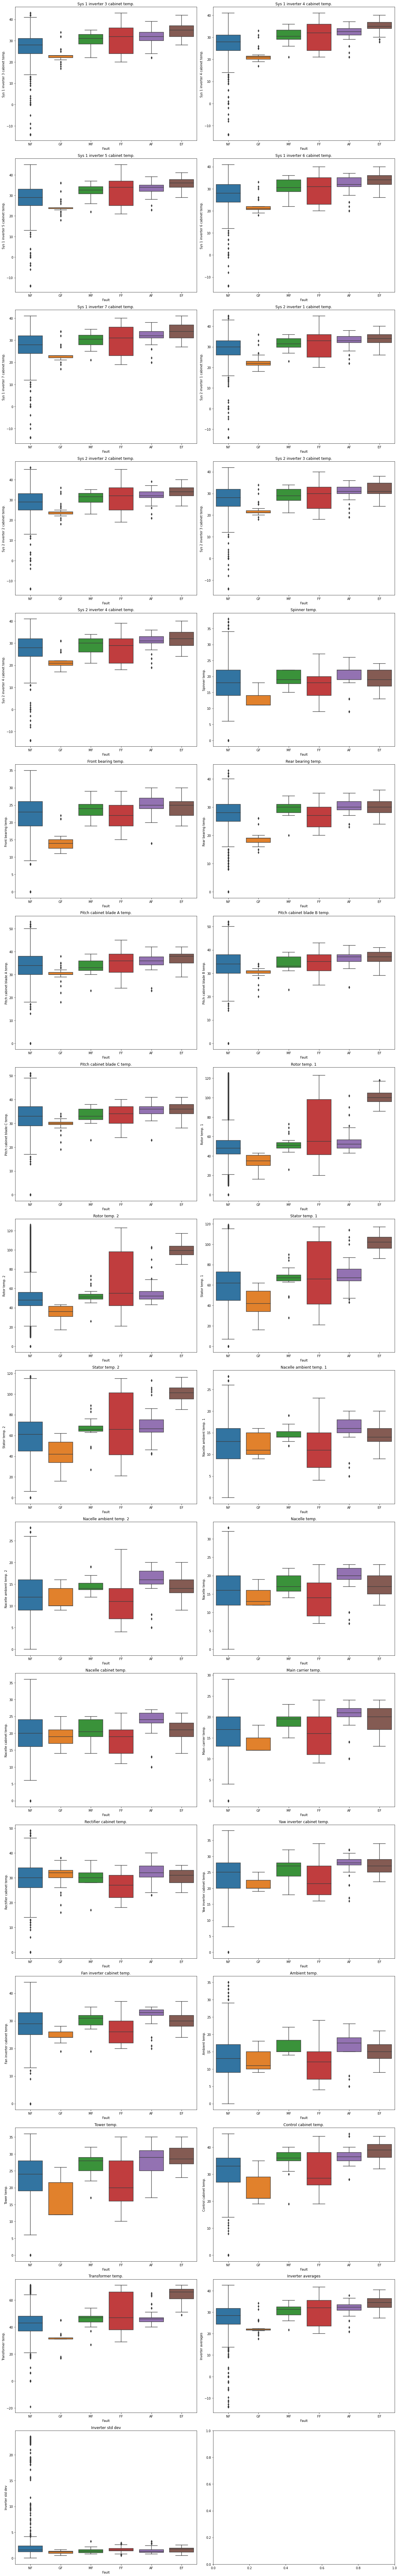

In [ ]:
import math

def featuresBoxPlot():
  columns = combinedData.columns[3:-1]

  columnsCount = len(columns)
  plotRowCount = int(math.ceil(columnsCount/2))

  f, axes = plt.subplots(nrows=plotRowCount, ncols=2, figsize=(18, 3.5*columnsCount))

  for x in range(columnsCount):
    parameterName = columns[x]
    columnNumber = 0 if x%2==0 else 1
    rowNumber = x//2
    sns.boxplot(x='Fault', y=parameterName, data=combinedData, ax=axes[rowNumber][columnNumber])
    axes[rowNumber][columnNumber].set_title(parameterName)

  plt.tight_layout()

featuresBoxPlot()

Se deben manipular los outliers debido a que los datos pertenecen a sensores cuales han podido tener fallos o puede que hasta en algun momento en si una turbina alla fallado. Tambien hay que tener en cuenta que esos outliers pueden tener un enorme significado en los datos debido a que puedan senalar anomalias, se debe normalizar los datos

Analizando los outliers puede darse cuenta de que:
- Sys 2 inverter 5 & 7, Blade A, B, C temp., hay outliers solo cuando no hay fallas en los datos, sus temperaturas llegan a ser muy distintas a todas las anteriormente vistas, podrian amputarse (por la media o mediana), borrarlos podria ser una perdida perjudical de los datos

In [ ]:
_25Percentile = combinedData['Sys 1 inverter 1 cabinet temp.'].quantile(0.25)
mode = combinedData['Sys 1 inverter 1 cabinet temp.'].mode().iloc[0]
combinedData.loc[combinedData['Sys 1 inverter 1 cabinet temp.'] < _25Percentile, 'Sys 1 inverter 1 cabinet temp.'] = mode


_99Percentile = combinedData.loc[combinedData['Fault'] == 'NF', 'Sys 2 inverter 5 cabinet temp.'].quantile(0.99)
mode = combinedData['Sys 2 inverter 5 cabinet temp.'].mode().iloc[0]
combinedData.loc[combinedData['Sys 2 inverter 5 cabinet temp.'] > _99Percentile, 'Sys 2 inverter 5 cabinet temp.'] = mode


_99Percentile = combinedData.loc[combinedData['Fault'] == 'NF', 'Sys 2 inverter 7 cabinet temp.'].quantile(0.99)
mode = combinedData['Sys 2 inverter 7 cabinet temp.'].mode().iloc[0]
combinedData.loc[combinedData['Sys 2 inverter 7 cabinet temp.'] > _99Percentile, 'Sys 2 inverter 7 cabinet temp.'] = mode


_1Percentile = combinedData.loc[combinedData['Fault'] == 'NF', 'Blade A temp.'].quantile(0.01)
mode = combinedData['Blade A temp.'].mode().iloc[0]
combinedData.loc[combinedData['Blade A temp.'] < _1Percentile, 'Blade A temp.'] = mode


_1Percentile = combinedData.loc[combinedData['Fault'] == 'NF', 'Blade B temp.'].quantile(0.01)
mode = combinedData['Blade B temp.'].mode().iloc[0]
combinedData.loc[combinedData['Blade B temp.'] < _1Percentile, 'Blade B temp.'] = mode


_1Percentile = combinedData.loc[combinedData['Fault'] == 'NF', 'Blade C temp.'].quantile(0.01)
mode = combinedData['Blade C temp.'].mode().iloc[0]
combinedData.loc[combinedData['Blade C temp.'] < _1Percentile, 'Blade C temp.'] = mode

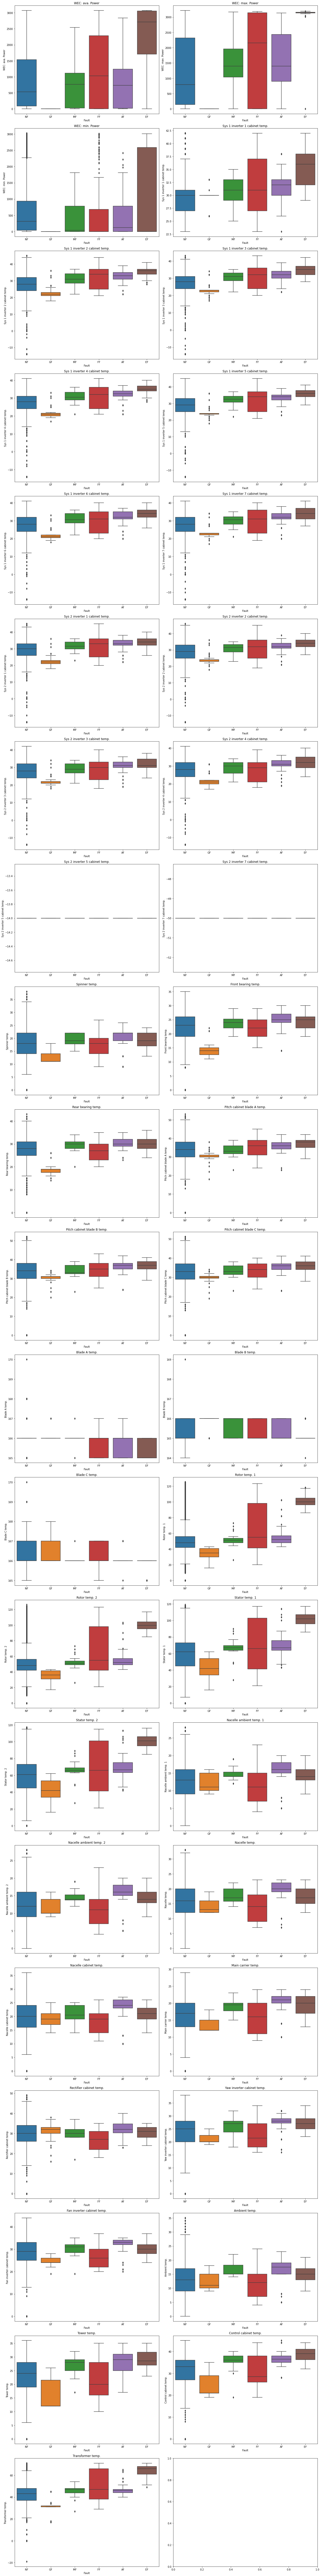

In [ ]:
featuresBoxPlot()

Podemos ver que las columnas Sys 2 inverter 5 cabinet temp. & Sys 2 inverter 7 cabinet temp. no dan mucha informacion, aseguremonos:

In [ ]:
combinedData[['Sys 2 inverter 5 cabinet temp.', 'Sys 2 inverter 7 cabinet temp.', 'Fault']].groupby('Fault').aggregate(['mean', 'min', 'max']).T

Fault                                  AF    EF    FF    GF    MF    NF
Sys 2 inverter 5 cabinet temp. mean -14.0 -14.0 -14.0 -14.0 -14.0 -14.0
                               min  -14.0 -14.0 -14.0 -14.0 -14.0 -14.0
                               max  -14.0 -14.0 -14.0 -14.0 -14.0 -14.0
Sys 2 inverter 7 cabinet temp. mean -50.0 -50.0 -50.0 -50.0 -50.0 -50.0
                               min  -50.0 -50.0 -50.0 -50.0 -50.0 -50.0
                               max  -50.0 -50.0 -50.0 -50.0 -50.0 -50.0

Como vemos no las columnas no sirven de nada, podemos borrarlas

In [ ]:
combinedData = combinedData.drop(columns = ['Sys 2 inverter 5 cabinet temp.', 'Sys 2 inverter 7 cabinet temp.'])

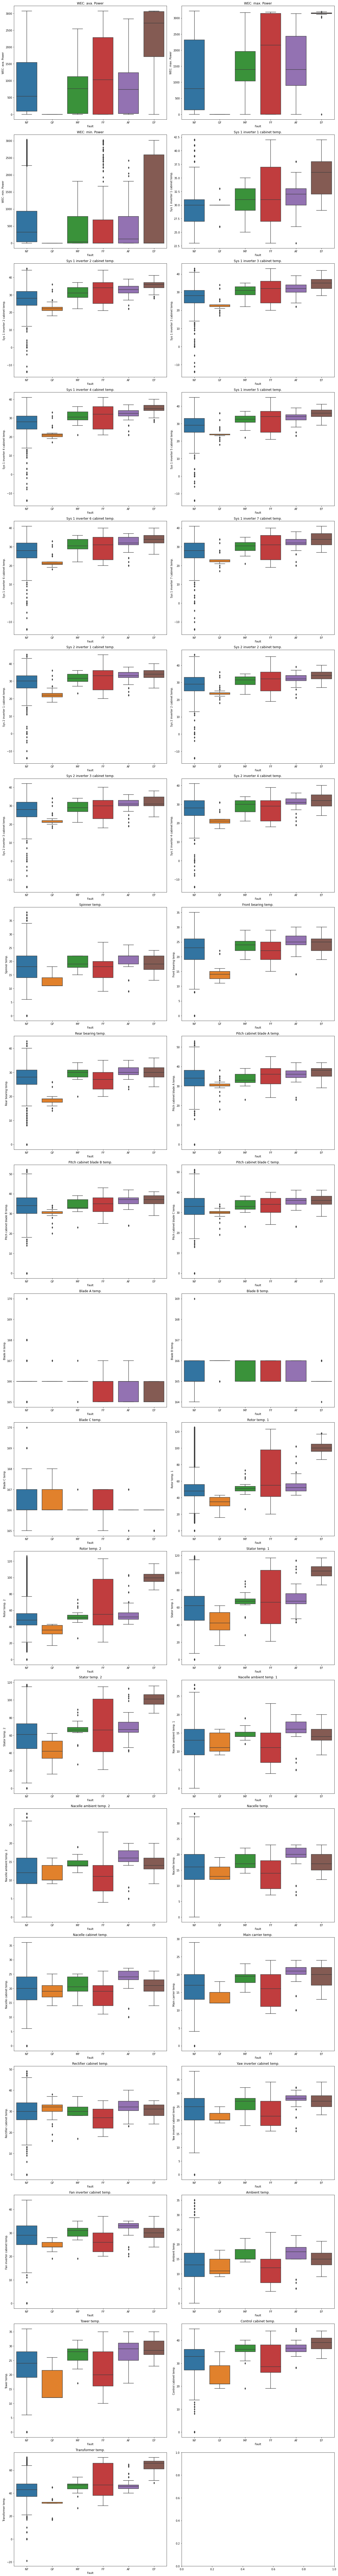

In [ ]:
featuresBoxPlot()

Tambien puede ver que las columnas Blade A temp., Blade B temp. y Blade C temp. no son muy relevantes, podemos eliminarlas

In [ ]:
combinedData = combinedData.drop(columns = ['Blade A temp.', 'Blade B temp.', 'Blade C temp.'])

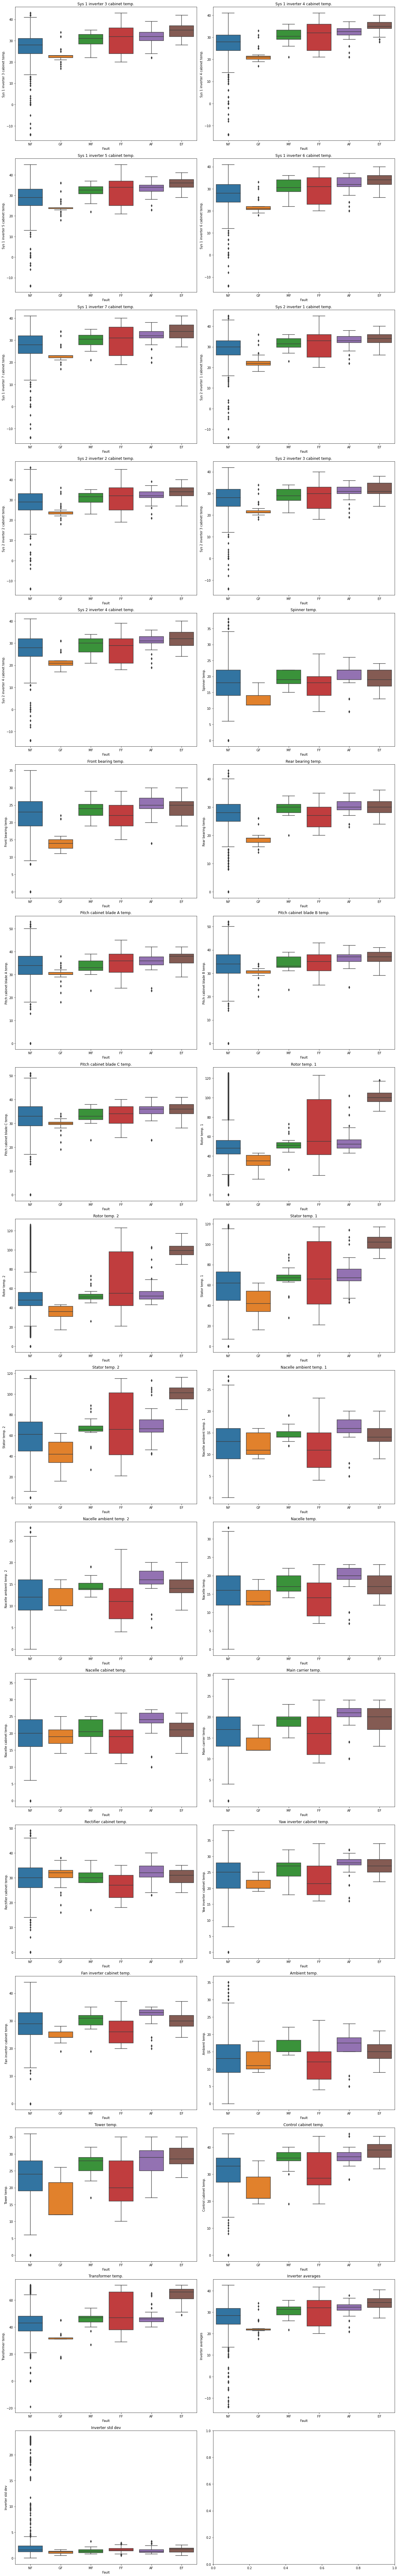

In [ ]:
featuresBoxPlot()

Puede haber una alta correlacion entre las features existentes, para acelerar el proceso podemos investigar las correlaciones entre las columnas

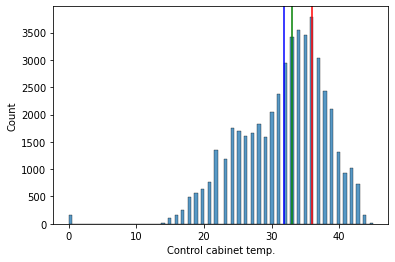

In [ ]:
column = "Control cabinet temp."
sns.histplot(combinedData, x=column)
plt.axvline(x=combinedData[column].mean(),
            color='blue')
plt.axvline(x=combinedData[column].median(),
            color='green')
plt.axvline(x=combinedData.mode()[column][0],
            color='red')

#plt.set_title("Distribution")
  

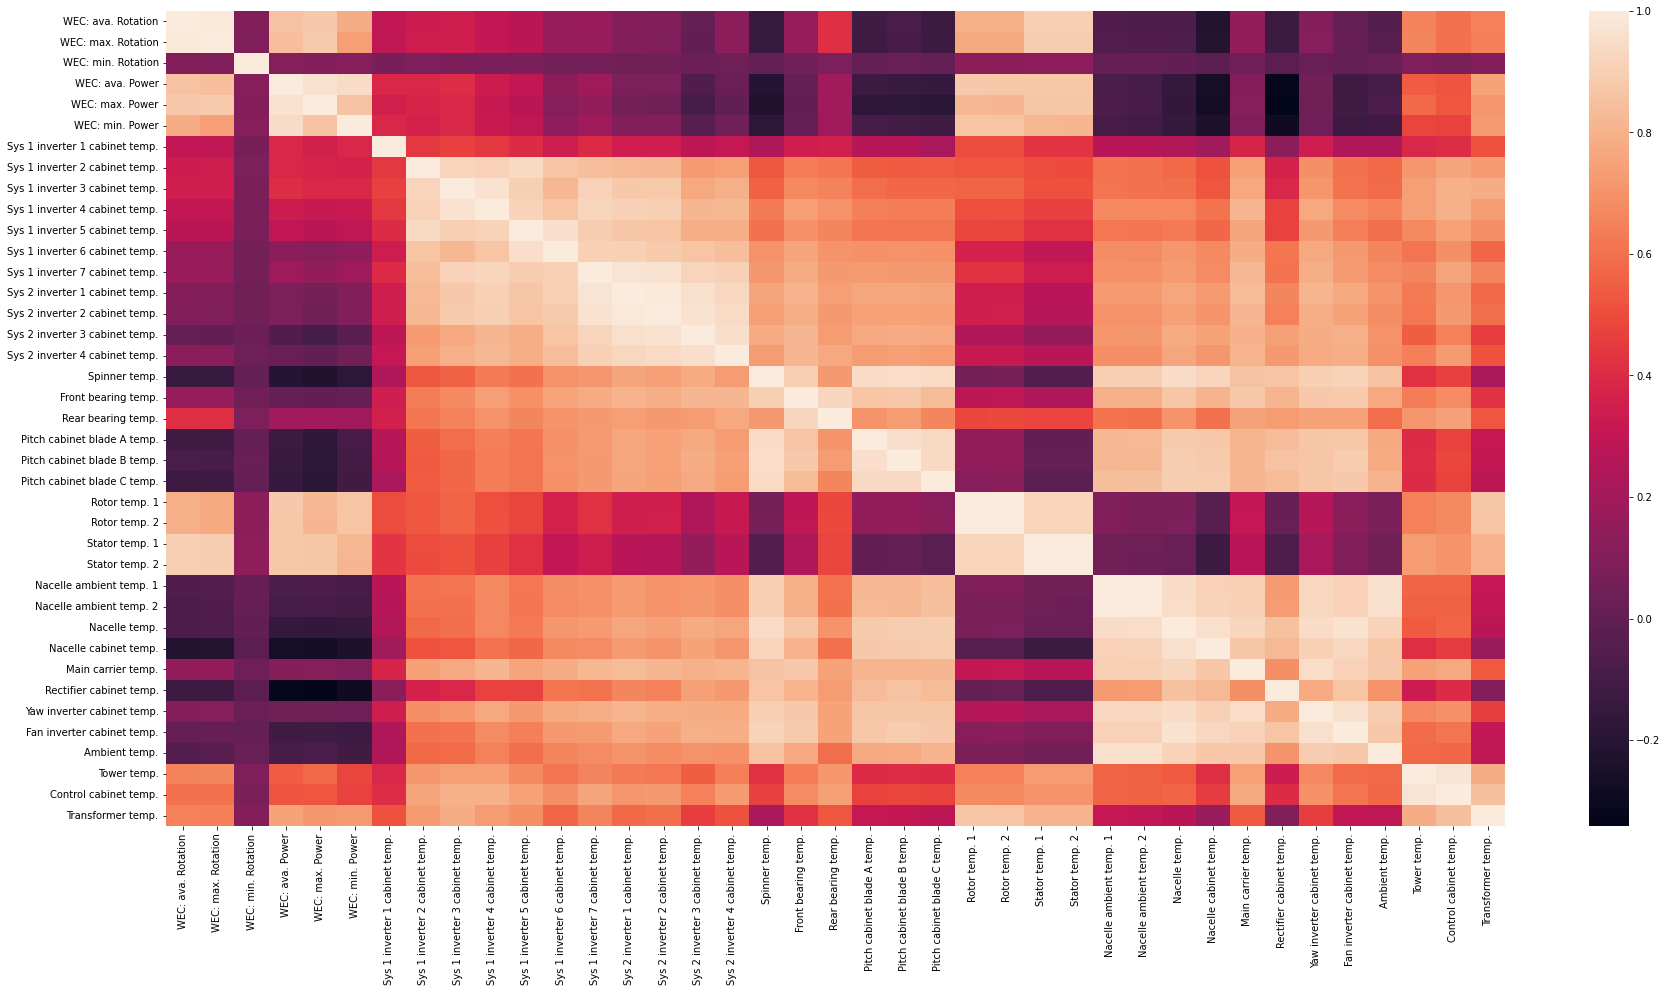

In [ ]:
temp = combinedData[combinedData.columns]
correlations = temp.corr()

fig, ax = plt.subplots(figsize=(30,15))         # Sample figsize in inches
sns.heatmap(correlations, ax=ax)
plt.show()

In [ ]:
def checkCorrelations():
  temp = combinedData[combinedData.columns]
  correlations = temp.corr()

  for x, row in correlations.iterrows():
    row = row.abs()
    sortedCurrentCorrelationValues = row.sort_values(ascending=False)
    attributes = sortedCurrentCorrelationValues.index.to_list()
    currentAttribute = attributes[0]
    print(currentAttribute, "-----------------------------------------", sep='\n', end='\n')
    for y in range(1, 10):
      crossAttribute = attributes[y]
      print(crossAttribute, ": ", row[crossAttribute], sep=' ')
    print('\n')

In [ ]:
checkCorrelations()

WEC: ava. Rotation
-----------------------------------------
WEC: max. Rotation :  0.9873295673943606
Stator temp. 2 :  0.8963255871985447
Stator temp. 1 :  0.8959289013577025
WEC: max. Power :  0.8757344340655487
WEC: ava. Power :  0.8584198408610317
Rotor temp. 2 :  0.7906373376530708
Rotor temp. 1 :  0.7905177052339717
WEC: min. Power :  0.7808097732758007
Tower temp. :  0.6535404396754316


WEC: max. Rotation
-----------------------------------------
WEC: ava. Rotation :  0.9873295673943606
Stator temp. 2 :  0.8918966256059703
Stator temp. 1 :  0.8914058407691718
WEC: max. Power :  0.884163938907988
WEC: ava. Power :  0.8380049892079348
Rotor temp. 1 :  0.7734186349441818
Rotor temp. 2 :  0.773412564079484
WEC: min. Power :  0.7374805427011103
Tower temp. :  0.6622474616106121


WEC: min. Rotation
-----------------------------------------
Stator temp. 1 :  0.13668518218399178
Stator temp. 2 :  0.13657226033264128
Rotor temp. 1 :  0.12885741132113704
Rotor temp. 2 :  0.1286363602997

Usamos la correlacion en vez de la covarancia debido a que la correlación es una medida normalizada que mide la fuerza y la dirección de la relación lineal entre dos variables, mientras que la covarancia  mide el grado en que dos variables se mueven juntas.

Las siguientes columnas tienen fuertes correlaciones con las columnas despues del guion:
- WEC: ava. Rotation - Stator temp. 2, Stator temp 1
-  WEC: max. Rotation - Stator temp. 2, Stator temp 1
- WEC: ava. Power - Rotor temp. 1, Rotor temp. 2
- WEC: max. Power - Stator temp. 1, Stator temp. 2
- WEC: min. Power - Rotor temp. 1, Rotor temp. 2

Debido a que en nuestro problema el uso de sensores de temperatura facilita el proceso de elaboracion de los microcontroladores podriamos borrar las principales columnas.



In [ ]:
combinedData = combinedData.drop(columns = ['WEC: ava. Rotation', 'WEC: max. Rotation', 'WEC: ava. Power', 'WEC: max. Power', 'WEC: min. Power'])

In [ ]:
checkCorrelations()

WEC: min. Rotation
-----------------------------------------
Stator temp. 1 :  0.13668518218399178
Stator temp. 2 :  0.13657226033264128
Rotor temp. 1 :  0.12885741132113704
Rotor temp. 2 :  0.1286363602997511
Transformer temp. :  0.10376467738287204
Tower temp. :  0.08789399713110214
Sys 1 inverter 2 cabinet temp. :  0.08450234832215825
Rear bearing temp. :  0.08284999883256708
Sys 1 inverter 3 cabinet temp. :  0.08162564597679173


Sys 1 inverter 1 cabinet temp.
-----------------------------------------
Transformer temp. :  0.5151899303695076
Rotor temp. 2 :  0.501742429347391
Rotor temp. 1 :  0.5014226617945561
Sys 1 inverter 3 cabinet temp. :  0.467612278724993
Sys 1 inverter 4 cabinet temp. :  0.4430573649489902
Sys 1 inverter 2 cabinet temp. :  0.4424748450983319
Stator temp. 1 :  0.4317878566702882
Stator temp. 2 :  0.4294618024058149
Control cabinet temp. :  0.4027928406494729


Sys 1 inverter 2 cabinet temp.
-----------------------------------------
Sys 1 inverter 5 cabinet te

Las demas columnas restantes tambien tienen muchas correlaciones fuertes, por ejemplo Sys 1 inverter {1-7} cabinet temp. o Sys 2 inverter {1-4} cabinet temp. podria agruparse debido a las fuertes correlaciones existentes entre si.

Las demas columnas deberan analizarse mas detalladamente para el proceso de seleccion de columnas.

In [ ]:
combinedData.columns

Index(['WEC: min. Rotation', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Sys 2 inverter 3 cabinet temp.', 'Sys 2 inverter 4 cabinet temp.',
       'Spinner temp.', 'Front bearing temp.', 'Rear bearing temp.',
       'Pitch cabinet blade A temp.', 'Pitch cabinet blade B temp.',
       'Pitch cabinet blade C temp.', 'Rotor temp. 1', 'Rotor temp. 2',
       'Stator temp. 1', 'Stator temp. 2', 'Nacelle ambient temp. 1',
       'Nacelle ambient temp. 2', 'Nacelle temp.', 'Nacelle cabinet temp.',
       'Main carrier temp.', 'Rectifier cabinet temp.',
       'Yaw inverter cabinet temp.', 'Fan inverter cabinet temp.',
       'Ambient temp.', 'Tower temp.', 'Control cabinet temp.',
       'Transformer

Podemos hacer rapidamente el test de ANOVA con pandas y Scipy, con las funciones groupBy y f_oneway. Si el valor p es menor que el nivel de significancia elegido (por ejemplo, 0.05), se puede rechazar la hipótesis nula y concluir que hay diferencias significativas entre los grupos. De lo contrario, no se pueden sacar conclusiones significativas.

In [ ]:
import scipy.stats as stats

columns = combinedData.columns.tolist()
columns.remove('Fault')
for column in columns:
  data = combinedData.groupby('Fault')[column].apply(list)
  f, p = stats.f_oneway(*data)
  print(column, "F statistic:", f, "P-value:", p, sep=' ')

WEC: min. Rotation F statistic: 1.911251827248269 P-value: 0.08885134229992266
Sys 1 inverter 1 cabinet temp. F statistic: 137.68449604032827 P-value: 1.6715445340675746e-145
Sys 1 inverter 2 cabinet temp. F statistic: 92.30187477250205 P-value: 4.678968772721114e-97
Sys 1 inverter 3 cabinet temp. F statistic: 88.08499164689509 P-value: 1.5027157025213601e-92
Sys 1 inverter 4 cabinet temp. F statistic: 90.20014046494843 P-value: 8.246705688047737e-95
Sys 1 inverter 5 cabinet temp. F statistic: 72.3582949572088 P-value: 9.709534233788848e-76
Sys 1 inverter 6 cabinet temp. F statistic: 56.804492354706476 P-value: 4.060744652498633e-59
Sys 1 inverter 7 cabinet temp. F statistic: 61.554601257491576 P-value: 3.417969070082166e-64
Sys 2 inverter 1 cabinet temp. F statistic: 46.51870607362368 P-value: 3.885102585059344e-48
Sys 2 inverter 2 cabinet temp. F statistic: 44.73157500254165 P-value: 3.1304559893579167e-46
Sys 2 inverter 3 cabinet temp. F statistic: 26.760589992611852 P-value: 4.0460

Normalmente se rechaza la hipotesis nula de un valor p menor que 0.05, pero al mirar todas las columnas podemos ver que solo hay una columna con un valor p bajo (0.08) la cual podria no tenerse en cuenta y rechazar su hipotesis nula. Borraremos la columna.

In [ ]:
combinedData = combinedData.drop(columns='WEC: min. Rotation')
combinedData

Sys 1 inverter 1 cabinet temp.  Sys 1 inverter 2 cabinet temp.  \
0                                  24                              26   
1                                  24                              26   
2                                  24                              26   
3                                  24                              26   
4                                  24                              26   
...                               ...                             ...   
49129                              30                              21   
49130                              30                              21   
49131                              30                              21   
49132                              30                              21   
49133                              30                              21   

       Sys 1 inverter 3 cabinet temp.  Sys 1 inverter 4 cabinet temp.  \
0                                  25                              24   
1                                  25                              24   
2                                  25                              24   
3                                  25                              24   
4                                  25                              24   
...                               ...                             ...   
49129                              21                              20   
49130                              21                              20   
49131                              21                              20   
49132                              21                              20   
49133                              21                              20   

       Sys 1 inverter 5 cabinet temp.  Sys 1 inverter 6 cabinet temp.  \
0                                  26                              25   
1                                  26                              25   
2                                  26                              25   
3                                  26                              25   
4                                  26                              25   
...                               ...                             ...   
49129                              25                              27   
49130                              26                              27   
49131                              25                              27   
49132                              22                              27   
49133                              22                              25   

       Sys 1 inverter 7 cabinet temp.  Sys 2 inverter 1 cabinet temp.  \
0                                  25                              27   
1                                  25                              27   
2                                  25                              27   
3                                  25                              27   
4                                  25                              27   
...                               ...                             ...   
49129                              27                              28   
49130                              26                              28   
49131                              26                              28   
49132                              26                              28   
49133                              26                              28   

       Sys 2 inverter 2 cabinet temp.  Sys 2 inverter 3 cabinet temp.  ...  \
0                                  27                              25  ...   
1                                  27                              25  ...   
2                                  27                              25  ...   
3                                  27                              25  ...   
4                                  27                              25  ...   
...                            

Que tal si se intenta reducir el numero de columnas usando un algoritmo de optimizacion? Efectivamente podria reducirse el numero de columnas usando ANOVA, Recursive Feature Selection, Chi-Square, Selection Based Decision Trees, etc. pero podriamos probar la efectividad de los algoritmos geneticos en este problema.

Los individuos pueden ser representados por una string, donde cada caracter representara una columna, el caracter sera 1 si la feature es seleccionada, si no sera 0. Esta representacion sera optima debido a que en Python cada caracter es equivalente a 1 Byte, debido a esto un individuo de N features pesara N bytes

La generacion de la populacion sera totalmente aleatoriamente.

La funcion de calculacion de fitness puede ser una gran reto, escapandonos de metodos estadisticos podriamos utilizar modelos de aprendizaje automatico como funcion de fitness. Podemos tener como candidatos modelos basicos y fuertes del campo como arboles de decisiones, bosque aleatorio o KNeighbors. Asi tampoco habra necesidad de continuar con el proceso de elaboracion de un modelo de aprendizaje automatico. Esta fase sera una fase experimental

## Ganancia de información ponderada como funcion fitness

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer, mutual_info_score, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
import random

class Chromosome:
  def __init__(self, encodedFeatures, maxFeatureCountToSelect):
    self.encodedFeatures = encodedFeatures
    self.usedFeaturesCount = encodedFeatures.count('1')
    self.maxFeatureCountToSelect = maxFeatureCountToSelect
    self.fitness = None

  def randomize(self):
    currentIndividual = ''
    current1s = 0
    for y in range(len(self.encodedFeatures)):
      gene = str(random.randint(0, 1))
      if gene == '1':
        if current1s > self.maxFeatureCountToSelect:
          currentIndividual += '0'
          continue
        else:
          current1s += 1
      currentIndividual += gene

    self.encodedFeatures = currentIndividual
    self.usedFeaturesCount = current1s
    self.fitness = None

  def getColumnIndices(self):
    return [index for index, char in enumerate(self.encodedFeatures) if char == '1']

  def calculateFitness(self, xTrain, xTest, yTrain, yTest):
    columnIndices = self.getColumnIndices()
    model = DecisionTreeClassifier(random_state=0)
    model.fit(xTrain.iloc[:, columnIndices], yTrain) 
    predictions = model.predict(xTest.iloc[:, columnIndices])
    cm = confusion_matrix(yTest, predictions)
    sample_weight = compute_sample_weight(class_weight='balanced', y=yTrain)
    mutual_info = mutual_info_score(yTest, predictions)
    weighted_mutual_info = mutual_info * np.mean(sample_weight)
    self.fitness = weighted_mutual_info

  def getChild(self, anotherChromosome):
    numberOfColumns = len(self.encodedFeatures)
    numberOfFeaturesToTakeOfFirstChromosome = random.randrange(0, numberOfColumns+1)
    numberOfFeaturesToTakeOfSecondChromosome =  numberOfColumns - numberOfFeaturesToTakeOfFirstChromosome

    columnsIndicesFirstChromosome = self.getColumnIndices()
    columnsIndicesSecondChomosome = anotherChromosome.getColumnIndices()

    random.shuffle(columnsIndicesFirstChromosome)
    random.shuffle(columnsIndicesSecondChomosome)

    columnsIndicesFirstChromosome = columnsIndicesFirstChromosome[0 : numberOfFeaturesToTakeOfFirstChromosome]
    columnsIndicesSecondChomosome = columnsIndicesSecondChomosome[0 : numberOfFeaturesToTakeOfSecondChromosome]

    featuresIndicesToTake = columnsIndicesFirstChromosome + columnsIndicesSecondChomosome

    childEncodedFeature = ['0']*len(self.encodedFeatures)
    current1sCount = 0
    for index in featuresIndicesToTake:
      childEncodedFeature[index] = '1'
      current1sCount += 1
      if current1sCount >= self.maxFeatureCountToSelect:
        break
    childEncodedFeature = "".join(childEncodedFeature)
    return Chromosome(childEncodedFeature, self.maxFeatureCountToSelect)

  def mutation(self):
    index = random.randrange(0, len(self.encodedFeatures))

    temp = [*self.encodedFeatures]
    if self.maxFeatureCountToSelect == self.usedFeaturesCount:
      if temp[index] == '1':
        self.usedFeaturesCount -= 1 
      temp[index] = '0'
      self.fitness = None
      return

    if self.usedFeaturesCount == 0:
      temp[index] = '1'
    else:
      temp[index] = '0' if temp[index] == '1' else '1'

    if temp[index] == '1':
      self.usedFeaturesCount += 1
    else:
      self.usedFeaturesCount -= 1 

    temp = "".join(temp)
    self.fitness = None
         
class Population:
  def __init__(self, populationSize):
    self.populationSize = populationSize
    self.chromosomes = []

  def setInitialPopulation(self, numberOfGenesForChromosomes, maxFeatureCountToSelect):
    for x in range(self.populationSize):
      defaultGenes = "0"*numberOfGenesForChromosomes
      chromosome = Chromosome(defaultGenes, maxFeatureCountToSelect)
      chromosome.randomize()
      self.chromosomes.append(chromosome)

  def calculateFitness(self, xTrain, xTest, yTrain, yTest):
    for chromosome in self.chromosomes:
      if chromosome.fitness is None:
        chromosome.calculateFitness(xTrain, xTest, yTrain, yTest)

  def sortByFitness(self):
    self.chromosomes = sorted(self.chromosomes, reverse = True, 
                              key=lambda x: x.fitness)
    
  def setNextGeneration(self, numberOfCandidatesToBeParent, eliteSize):
    nextGeneration = []
    for x in range(eliteSize):
      nextGeneration.append(self.chromosomes[x])

    endFor = self.populationSize - eliteSize
    for x in range(endFor):
      parent1Index = random.randrange(0, numberOfCandidatesForBeParent)
      parent2Index = random.randrange(0, numberOfCandidatesForBeParent)

      parent1 = self.chromosomes[parent1Index]
      parent2 = self.chromosomes[parent2Index]

      child = parent1.getChild(parent2)
      nextGeneration.append(child)

    self.chromosomes = nextGeneration

  def randomMutation(self):
    for chromosome in self.chromosomes:
      mut = random.uniform(0, 1)
      if mut <= .61:
        chromosome.mutation()

class GeneticAlgorithm:
  def __init__(self, populationSize, eliteSize, numberOfCandidatesForBeParent, generations,
               maxFeatureCountToSelect, xTrain, xTest, yTrain, yTest):
    self.populationSize = populationSize
    self.eliteSize = eliteSize 
    self.numberOfCandidatesForBeParent = numberOfCandidatesForBeParent
    self.generations = generations

    self.maxFeatureCountToSelect = maxFeatureCountToSelect
    self.xTrain = xTrain
    self.xTest = xTest
    self.yTrain = yTrain
    self.yTest = yTest

  def execute(self):
    population = Population(self.populationSize)
    numberOfFeatures = self.xTrain.shape[1]
    population.setInitialPopulation(numberOfFeatures, self.maxFeatureCountToSelect)

    bestFitness = 0
    bestColumnsIndices = []

    for generation in range(self.generations):
      population.calculateFitness(self.xTrain, self.xTest, self.yTrain, self.yTest)
      population.sortByFitness()

      bestCurrentChoromosome = population.chromosomes[0]
      print(generation, ". Generation Weight by Information Gain Value Of Best: ", bestCurrentChoromosome.fitness, 
            ", Encoded Columns: ", bestCurrentChoromosome.encodedFeatures, sep='')
      
      if bestCurrentChoromosome.fitness > bestFitness:
        bestFitness = bestCurrentChoromosome.fitness
        bestColumnsIndices = bestCurrentChoromosome.getColumnIndices().copy()

      population.setNextGeneration(self.numberOfCandidatesForBeParent, self.eliteSize)
      population.randomMutation()

    return bestColumnsIndices

In [ ]:
populationSize = 70
eliteSize = 30
numberOfCandidatesForBeParent = 25
generations = 200

x, y = combinedData.iloc[:, :-1], combinedData.Fault
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4, random_state=42, stratify = y)          

maxFeaturesToUse = 10

GA = GeneticAlgorithm(populationSize, eliteSize, 
                      numberOfCandidatesForBeParent, generations, maxFeaturesToUse, 
                      xTrain, xTest, yTrain, yTest)

bestColumnIndices = GA.execute()
bestColumnIndices

0. Generation Weight by Information Gain Value Of Best: 0.030554598409362126, Encoded Columns: 10111010000000000100100001001100010000
1. Generation Weight by Information Gain Value Of Best: 0.030554598409362126, Encoded Columns: 10111010000000000100100001001100010000
2. Generation Weight by Information Gain Value Of Best: 0.030554598409362126, Encoded Columns: 10111010000000000100100001001100010000
3. Generation Weight by Information Gain Value Of Best: 0.030554598409362126, Encoded Columns: 10111010000000000100100001001100010000
4. Generation Weight by Information Gain Value Of Best: 0.030554598409362126, Encoded Columns: 10111010000000000100100001001100010000
5. Generation Weight by Information Gain Value Of Best: 0.030554598409362126, Encoded Columns: 10111010000000000100100001001100010000
6. Generation Weight by Information Gain Value Of Best: 0.031272971199858876, Encoded Columns: 00011100000001001000000001110000010000
7. Generation Weight by Information Gain Value Of Best: 0.0312

[0, 2, 3, 4, 8, 23, 25, 28, 33]

## Akaike Information Criterion como funcion fitness

In [ ]:
import statsmodels.api as sm
import random

class Chromosome:
  def __init__(self, encodedFeatures, maxFeatureCountToSelect):
    self.encodedFeatures = encodedFeatures
    self.usedFeaturesCount = encodedFeatures.count('1')
    self.maxFeatureCountToSelect = maxFeatureCountToSelect
    self.fitness = None

  def randomize(self):
    currentIndividual = ''
    current1s = 0
    for y in range(len(self.encodedFeatures)):
      gene = str(random.randint(0, 1))
      if gene == '1':
        if current1s > self.maxFeatureCountToSelect:
          currentIndividual += '0'
          continue
        else:
          current1s += 1
      currentIndividual += gene

    self.encodedFeatures = currentIndividual
    self.usedFeaturesCount = current1s
    self.fitness = None

  def getColumnIndices(self):
    return [index for index, char in enumerate(self.encodedFeatures) if char == '1']

  def calculateFitness(self, data):
    columnIndices = self.getColumnIndices()
    # Ajuste de un modelo de regresión logística multinomial con las columnas seleccionadas
    model = sm.MNLogit(data['Fault'], sm.add_constant(data.iloc[:, columnIndices])).fit()
    # Cálculo del AIC del modelo
    AIC = model.aic

    self.fitness = AIC

  def getChild(self, anotherChromosome):
    numberOfColumns = len(self.encodedFeatures)
    numberOfFeaturesToTakeOfFirstChromosome = random.randrange(0, numberOfColumns+1)
    numberOfFeaturesToTakeOfSecondChromosome =  numberOfColumns - numberOfFeaturesToTakeOfFirstChromosome

    columnsIndicesFirstChromosome = self.getColumnIndices()
    columnsIndicesSecondChomosome = anotherChromosome.getColumnIndices()

    random.shuffle(columnsIndicesFirstChromosome)
    random.shuffle(columnsIndicesSecondChomosome)

    columnsIndicesFirstChromosome = columnsIndicesFirstChromosome[0 : numberOfFeaturesToTakeOfFirstChromosome]
    columnsIndicesSecondChomosome = columnsIndicesSecondChomosome[0 : numberOfFeaturesToTakeOfSecondChromosome]

    featuresIndicesToTake = columnsIndicesFirstChromosome + columnsIndicesSecondChomosome

    childEncodedFeature = ['0']*len(self.encodedFeatures)
    current1sCount = 0
    for index in featuresIndicesToTake:
      childEncodedFeature[index] = '1'
      current1sCount += 1
      if current1sCount >= self.maxFeatureCountToSelect:
        break
    childEncodedFeature = "".join(childEncodedFeature)
    return Chromosome(childEncodedFeature, self.maxFeatureCountToSelect)

  def mutation(self):
    index = random.randrange(0, len(self.encodedFeatures))

    temp = [*self.encodedFeatures]
    if self.maxFeatureCountToSelect == self.usedFeaturesCount:
      if temp[index] == '1':
        self.usedFeaturesCount -= 1 
      temp[index] = '0'
      self.fitness = None
      return

    if self.usedFeaturesCount == 0:
      temp[index] = '1'
    else:
      temp[index] = '0' if temp[index] == '1' else '1'

    if temp[index] == '1':
      self.usedFeaturesCount += 1
    else:
      self.usedFeaturesCount -= 1 

    temp = "".join(temp)
    self.fitness = None
         
class Population:
  def __init__(self, populationSize):
    self.populationSize = populationSize
    self.chromosomes = []

  def setInitialPopulation(self, numberOfGenesForChromosomes, maxFeatureCountToSelect):
    for x in range(self.populationSize):
      defaultGenes = "0"*numberOfGenesForChromosomes
      chromosome = Chromosome(defaultGenes, maxFeatureCountToSelect)
      chromosome.randomize()
      self.chromosomes.append(chromosome)

  def calculateFitness(self, data):
    for chromosome in self.chromosomes:
      if chromosome.fitness is None:
        chromosome.calculateFitness(data)

  def sortByFitness(self):
    self.chromosomes = sorted(self.chromosomes, reverse = False, 
                              key=lambda x: x.fitness)
    
  def setNextGeneration(self, numberOfCandidatesToBeParent, eliteSize):
    nextGeneration = []
    for x in range(eliteSize):
      nextGeneration.append(self.chromosomes[x])

    endFor = self.populationSize - eliteSize
    for x in range(endFor):
      parent1Index = random.randrange(0, numberOfCandidatesForBeParent)
      parent2Index = random.randrange(0, numberOfCandidatesForBeParent)

      parent1 = self.chromosomes[parent1Index]
      parent2 = self.chromosomes[parent2Index]

      child = parent1.getChild(parent2)
      nextGeneration.append(child)

    self.chromosomes = nextGeneration

  def randomMutation(self):
    for chromosome in self.chromosomes:
      mut = random.uniform(0, 1)
      if mut <= .44:
        chromosome.mutation()

class GeneticAlgorithm:
  def __init__(self, populationSize, eliteSize, numberOfCandidatesForBeParent, generations,
               maxFeatureCountToSelect, data):
    self.populationSize = populationSize
    self.eliteSize = eliteSize 
    self.numberOfCandidatesForBeParent = numberOfCandidatesForBeParent
    self.generations = generations

    self.maxFeatureCountToSelect = maxFeatureCountToSelect
    self.data = data

  def execute(self):
    population = Population(self.populationSize)
    numberOfFeatures = len(self.data.columns.tolist()) - 1
    population.setInitialPopulation(numberOfFeatures, self.maxFeatureCountToSelect)

    bestFitness = float('inf')
    bestColumnsIndices = []

    for generation in range(self.generations):
      population.calculateFitness(self.data)
      population.sortByFitness()

      bestCurrentChoromosome = population.chromosomes[0]
      print(generation, ". Generation Akaike Information Criterion Score Of Best: ", bestCurrentChoromosome.fitness, 
            ", Encoded Columns: ", bestCurrentChoromosome.encodedFeatures, sep='')
      
      if bestCurrentChoromosome.fitness < bestFitness:
        bestFitness = bestCurrentChoromosome.fitness
        bestColumnsIndices = bestCurrentChoromosome.getColumnIndices().copy()

      population.setNextGeneration(self.numberOfCandidatesForBeParent, self.eliteSize)
      population.randomMutation()

    return bestColumnsIndices

In [ ]:
populationSize = 100
eliteSize = 60
numberOfCandidatesForBeParent = 30
generations = 50

maxFeaturesToUse = 10

GA = GeneticAlgorithm(populationSize, eliteSize, 
                      numberOfCandidatesForBeParent, generations, maxFeaturesToUse, 
                      combinedData)

bestColumnIndices = GA.execute()
bestColumnIndices

Optimization terminated successfully.
         Current function value: 0.061909
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.058023
         Iterations 25
Optimization terminated successfully.
         Current function value: 0.060037
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.064742
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.059339
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.060742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.057027
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.052157
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.056329
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.060849
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060142
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.058214
         Iterations 23
Optimization terminated successfully.
         Current function value: 0.061620
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.057892
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.062935
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.058319

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.058111
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.060647
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.059832
         Iterations 24
Optimization terminated successfully.
         Current function value: 0.060584
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.060192
         Iterations 23
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.056681
         Iterations 23
         Current function value: 0.063002
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.059746
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.062963
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.060857
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.058119
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.059956
         Iterations 32
Optimization terminated successfully.
         Current function value: 0.061217
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.059470
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.053340
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.059127
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.059979
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.055186
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.059572
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.058968
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060322
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.057733
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.059853
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.058012
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.059154
         Iterations 26
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060770
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.060849
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061620
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.062935
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.057069
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.057733
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060584
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.060742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060840
         Iterations 25
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061620
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061909
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.062935
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060259
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.059811
         Iterations 25
Optimization terminated successfully.
         Current function value: 0.058890
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.057896
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.063699
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.058241
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.058143
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.060209
         Iterations 24
Optimization terminated successfully.
         Current function value: 0.055372
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060647
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.060742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060770
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061620
         Iterations 11
Optimization terminated successfully.
         Current function value: nan
         Iterations 7
         Current function value: 0.053275
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.055186
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.059756
         Iterations 30
Optimization terminated successfully.
         Current function value: 0.060656
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060021
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.058945
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.053161
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.060133
         Iterations 23
Optimization terminated successfully.
         Current function value: 0.061374
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.053161
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.059509
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.059552
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.058585
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.058257
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060410
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.058292
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.057694
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.060133
         Iterations 23
Optimization terminated successfully.
         Current function value: 0.059852
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060584
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.060647
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.060742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060770
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.060786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060849
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.053340
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.055186
         Iterations 22
Optimization terminated successfully.
         Current function value: nan
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.053161
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.059815
         Iterations 24
Optimization terminated successfully.
         Current function value: 0.059882
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.061186
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.060219
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.059578
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.059386

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060840
         Iterations 25
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061620
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.064742
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.053340
         Iterations 17
Optimization terminated successfully.
         Current function value: na

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.053161
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061566
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.059552
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.059266
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.052363
         Iterations 13
7. Generation Akaike Information Criterion Score Of Best: 5245.377430395897, Encoded Columns: 00100000100111000001000010101100000100
Optimization terminated successfully.
         Current function value: 0.052363
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.052363
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.056681
         Iterations 23
Optimization terminated successfully.
     

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060770
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.060786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060705
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.057518
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.059815
         Iterations 24
Optimization terminated successfully.
         Current function value: 0.061764
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.055437
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.054963
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.059139
         Iterations 21
Optimization terminated successfully.
         Current function value: nan
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.059541
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.060537
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.052363
         Iterations 13
10. Generation Akaike Information Criterion Score Of Best: 5245.377430395897, Encoded Columns: 00100000100111000001000010101100000100
Optimization terminated successfully.
         Current function value: 0.052157
         Iterations 22
Optimization terminated successfully.
         C

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.058759
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.057815
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.058125
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.058661
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.058478
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.054846
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.057720
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060647
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.060742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060840
         Iterations 25
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061909
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.062935
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.064742
         Iterations 19
Optimization terminated successfully.
         Current function value: na

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060584
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.060647
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061909
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.058364
         Iterations 25
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060812
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.052363
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.052363
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.056873
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.058864
         Iterations 24
Optimization terminated successfully.
         Current function value: 0.055651
         Iterations 26
Optimization terminated successfully.
         Current function value: 0.060508
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.060187
         Iterations 21
16. Generation Akaike Information Criterion Score Of Best: 5245.377430395897, Encoded Columns: 00100000100111000001000010101100000100
Optimization terminated successfully.
    

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061909
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.058013
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.059007
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.058915
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.057113
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.058277
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061909
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.064742
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.056942
         Iterations 23
Optimization terminated successfully.
         Current function value: 0.058486
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.056220
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.057103
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.056904
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.059983
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.052363
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.058806
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060620
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.059881
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060647
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.060786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060840
         Iterations 25
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.061909
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.062935
         Iterations 20
Optimization terminated successfully.
         Current function value: na

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060647
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.060770
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.060849
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061111
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.060511
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.060457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060481
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.060770
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.060786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060929
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060988
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061620
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.062935
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.064742
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Se han truncado las últimas 5000 líneas del flujo de salida.
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
24. Generation Akaike Information Criterion Score Of Best: 5245.377430395897, Encoded Columns: 00100000100111000001000010101100000100
Optimization terminated successfully.
         Current function value: 0.052157
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.052323
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.053161
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.055372
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.056681
         Iterations 23
Optimization terminated successfully.
         Current function value: 0.057027
    

[2, 8, 11, 12, 13, 19, 24, 26, 28, 29, 35]

In [ ]:
combinedData.iloc[:, [2, 8, 11, 12, 13, 19, 24, 26, 28, 29, 35]].columns

Index(['Sys 1 inverter 3 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Spinner temp.', 'Front bearing temp.', 'Rear bearing temp.',
       'Stator temp. 1', 'Nacelle cabinet temp.', 'Rectifier cabinet temp.',
       'Fan inverter cabinet temp.', 'Ambient temp.', 'Fault'],
      dtype='object')

## Modelo de aprendizaje automatico como funcion fitness

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random

class Chromosome:
  def __init__(self, encodedFeatures, maxFeatureCountToSelect):
    self.encodedFeatures = encodedFeatures
    self.usedFeaturesCount = encodedFeatures.count('1')
    self.maxFeatureCountToSelect = maxFeatureCountToSelect
    self.fitness = None

  def randomize(self):
    currentIndividual = ''
    current1s = 0
    for y in range(len(self.encodedFeatures)):
      gene = str(random.randint(0, 1))
      if gene == '1':
        if current1s > self.maxFeatureCountToSelect:
          currentIndividual += '0'
          continue
        else:
          current1s += 1
      currentIndividual += gene

    self.encodedFeatures = currentIndividual
    self.usedFeaturesCount = current1s
    self.fitness = None

  def getColumnIndices(self):
    return [index for index, char in enumerate(self.encodedFeatures) if char == '1']

  def calculateFitness(self, model, xTrain, xTest, yTrain, yTest):
    columnIndices = self.getColumnIndices()
    model.fit(xTrain.iloc[:, columnIndices], yTrain) 
    predictions = model.predict(xTest.iloc[:, columnIndices])
    f1Score = f1_score(yTest, predictions, average='weighted')
    self.fitness = f1Score

  def getChild(self, anotherChromosome):
    numberOfColumns = len(self.encodedFeatures)
    numberOfFeaturesToTakeOfFirstChromosome = random.randrange(0, numberOfColumns+1)
    numberOfFeaturesToTakeOfSecondChromosome =  numberOfColumns - numberOfFeaturesToTakeOfFirstChromosome

    columnsIndicesFirstChromosome = self.getColumnIndices()
    columnsIndicesSecondChomosome = anotherChromosome.getColumnIndices()

    random.shuffle(columnsIndicesFirstChromosome)
    random.shuffle(columnsIndicesSecondChomosome)

    columnsIndicesFirstChromosome = columnsIndicesFirstChromosome[0 : numberOfFeaturesToTakeOfFirstChromosome]
    columnsIndicesSecondChomosome = columnsIndicesSecondChomosome[0 : numberOfFeaturesToTakeOfSecondChromosome]

    featuresIndicesToTake = columnsIndicesFirstChromosome + columnsIndicesSecondChomosome

    childEncodedFeature = ['0']*len(self.encodedFeatures)
    current1sCount = 0
    for index in featuresIndicesToTake:
      childEncodedFeature[index] = '1'
      current1sCount += 1
      if current1sCount >= self.maxFeatureCountToSelect:
        break
    childEncodedFeature = "".join(childEncodedFeature)
    return Chromosome(childEncodedFeature, self.maxFeatureCountToSelect)

  def mutation(self):
    index = random.randrange(0, len(self.encodedFeatures))

    temp = [*self.encodedFeatures]
    if self.maxFeatureCountToSelect == self.usedFeaturesCount:
      if temp[index] == '1':
        self.usedFeaturesCount -= 1 
      temp[index] = '0'
      self.fitness = None
      return

    if self.usedFeaturesCount == 0:
      temp[index] = '1'
    else:
      temp[index] = '0' if temp[index] == '1' else '1'

    if temp[index] == '1':
      self.usedFeaturesCount += 1
    else:
      self.usedFeaturesCount -= 1 

    temp = "".join(temp)
    self.fitness = None
         
class Population:
  def __init__(self, populationSize):
    self.populationSize = populationSize
    self.chromosomes = []

  def setInitialPopulation(self, numberOfGenesForChromosomes, maxFeatureCountToSelect):
    for x in range(self.populationSize):
      defaultGenes = "0"*numberOfGenesForChromosomes
      chromosome = Chromosome(defaultGenes, maxFeatureCountToSelect)
      chromosome.randomize()
      self.chromosomes.append(chromosome)

  def calculateFitness(self, model, xTrain, xTest, yTrain, yTest):
    for chromosome in self.chromosomes:
      if chromosome.fitness is None:
        chromosome.calculateFitness(model, xTrain, xTest, yTrain, yTest)

  def sortByFitness(self):
    self.chromosomes = sorted(self.chromosomes, reverse = True, 
                              key=lambda x: x.fitness)
    
  def setNextGeneration(self, numberOfCandidatesToBeParent, eliteSize):
    nextGeneration = []
    for x in range(eliteSize):
      nextGeneration.append(self.chromosomes[x])

    endFor = self.populationSize - eliteSize
    for x in range(endFor):
      parent1Index = random.randrange(0, numberOfCandidatesForBeParent)
      parent2Index = random.randrange(0, numberOfCandidatesForBeParent)

      parent1 = self.chromosomes[parent1Index]
      parent2 = self.chromosomes[parent2Index]

      child = parent1.getChild(parent2)
      nextGeneration.append(child)

    self.chromosomes = nextGeneration

  def randomMutation(self):
    for chromosome in self.chromosomes:
      mut = random.uniform(0, 1)
      if mut <= .44:
        chromosome.mutation()

class GeneticAlgorithm:
  def __init__(self, populationSize, eliteSize, numberOfCandidatesForBeParent, generations,
               maxFeatureCountToSelect, model, xTrain, xTest, yTrain, yTest):
    self.populationSize = populationSize
    self.eliteSize = eliteSize 
    self.numberOfCandidatesForBeParent = numberOfCandidatesForBeParent
    self.generations = generations

    self.maxFeatureCountToSelect = maxFeatureCountToSelect
    self.model = model 
    self.xTrain = xTrain
    self.xTest = xTest
    self.yTrain = yTrain
    self.yTest = yTest

  def execute(self):
    population = Population(self.populationSize)
    numberOfFeatures = self.xTrain.shape[1]
    population.setInitialPopulation(numberOfFeatures, self.maxFeatureCountToSelect)

    bestFitness = 0
    bestColumnsIndices = []

    for generation in range(self.generations):
      population.calculateFitness(self.model, self.xTrain, self.xTest, self.yTrain, self.yTest)
      population.sortByFitness()

      bestCurrentChoromosome = population.chromosomes[0]
      print(generation, ". Generation F1 Score Of Best: ", bestCurrentChoromosome.fitness, 
            ", Encoded Columns: ", bestCurrentChoromosome.encodedFeatures, sep='')
      
      if bestCurrentChoromosome.fitness > bestFitness:
        bestFitness = bestCurrentChoromosome.fitness
        bestColumnsIndices = bestCurrentChoromosome.getColumnIndices().copy()

      population.setNextGeneration(self.numberOfCandidatesForBeParent, self.eliteSize)
      population.randomMutation()

    return bestColumnsIndices

Antes de empezar tenemos un grave problema de que los datos son imbalanceados, veamos la cantidad por clase

In [ ]:
combinedData.groupby('Fault')['Fault'].count()

Fault
AF       62
EF      174
FF      254
GF       43
MF       20
NF    48581
Name: Fault, dtype: int64

Como puede ver NF sobresale, debido a que estamos experimentando para el proceso de seleccion de features haremos directamente undersampling

<AxesSubplot:title={'center':'Fault Modes'}, ylabel='Fault'>

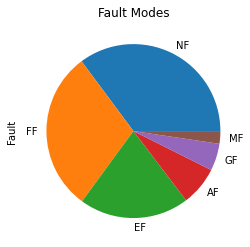

In [ ]:
experimentalData = combinedData.sample(frac=1)
NFIndices = experimentalData[experimentalData.Fault == 'NF'].index.tolist()

np.random.shuffle(NFIndices)
NFIndices = NFIndices[300: len(NFIndices)]
experimentalData = experimentalData.drop(NFIndices).reset_index()

experimentalData.Fault.value_counts().plot.pie(title='Fault Modes')

In [ ]:
values = ['NF', 'MF', 'GF', 'AF', 'EF', 'FF']
def encodeFault(value):
  return values.index(value)

def decodeFault(index):
  return values[index]

experimentalData.Fault = experimentalData.Fault.apply(lambda value: encodeFault(value))

In [ ]:
from sklearn.metrics import confusion_matrix

populationSize = 100
eliteSize = 60
numberOfCandidatesForBeParent = 30
generations = 50

classifiers = ['RandomForest', 'DecisionTree', 'KNeighbors']

models = [RandomForestClassifier(n_estimators=60, random_state=0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(n_neighbors = 3)]

model = models[1]

x, y = experimentalData.iloc[:, :-1], experimentalData.Fault
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4, random_state=42, stratify = y)          

maxFeaturesToUse = 10

GA = GeneticAlgorithm(populationSize, eliteSize, 
                      numberOfCandidatesForBeParent, generations, maxFeaturesToUse, 
                      model, xTrain, xTest, yTrain, yTest)

bestColumnIndices = GA.execute()
bestColumnIndices

0. Generation F1 Score Of Best: 0.6894173912110886, Encoded Columns: 111001001101010011100000000000000000000
1. Generation F1 Score Of Best: 0.7034062033378394, Encoded Columns: 101000000011100010010010000011000000000
2. Generation F1 Score Of Best: 0.7034062033378394, Encoded Columns: 101000000011100010010010000011000000000
3. Generation F1 Score Of Best: 0.7034062033378394, Encoded Columns: 101000000011100010010010000011000000000
4. Generation F1 Score Of Best: 0.7034062033378394, Encoded Columns: 101000000011100010010010000011000000000
5. Generation F1 Score Of Best: 0.7034062033378394, Encoded Columns: 101000000011100010010010000011000000000
6. Generation F1 Score Of Best: 0.7034062033378394, Encoded Columns: 101000000011100010010010000011000000000
7. Generation F1 Score Of Best: 0.7034062033378394, Encoded Columns: 101000000011100010010010000011000000000
8. Generation F1 Score Of Best: 0.7034062033378394, Encoded Columns: 101000000011100010010010000011000000000
9. Generation F1 Sc

[0, 2, 10, 11, 12, 16, 19, 22, 28, 29]

Sys 1 inverter 1 cabinet temp.
Sys 1 inverter 3 cabinet temp.
Sys 2 inverter 4 cabinet temp.
Spinner temp.
Front bearing temp.
Pitch cabinet blade C temp.
Blade C temp.
Stator temp. 1
Main carrier temp.
Rectifier cabinet temp.



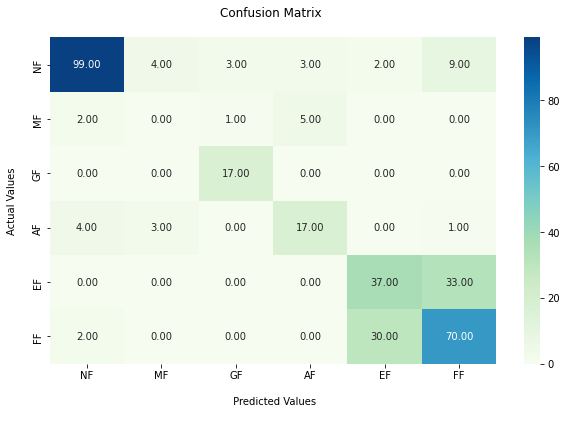

In [ ]:
for x in bestColumnIndices:
  print(combinedData.columns[x])
print()

x, y = experimentalData.iloc[:, bestColumnIndices], experimentalData.Fault
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4, random_state=42, stratify = y)     

model.fit(xTrain, yTrain) 
predictions = model.predict(xTest)

plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(yTest, predictions, labels = [x for x in range(len(values))]), 
               annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(values)
fx.yaxis.set_ticklabels(values)
plt.show()

<AxesSubplot:title={'center':'Fault Modes'}, ylabel='Fault'>

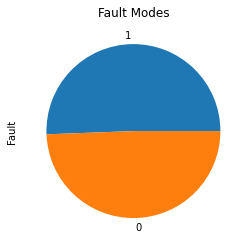

In [ ]:
experimentalData = combinedData.sample(frac=1)
experimentalData.Fault = experimentalData.Fault.apply(lambda value : 0 if value == 'NF' else 1)
NFIndices = experimentalData[experimentalData.Fault == 0].index.tolist()

np.random.shuffle(NFIndices)
NFIndices = NFIndices[540: len(NFIndices)]
experimentalData = experimentalData.drop(NFIndices).reset_index()

experimentalData.Fault.value_counts().plot.pie(title='Fault Modes')

In [ ]:
from sklearn.metrics import confusion_matrix

populationSize = 450
eliteSize = 300
numberOfCandidatesForBeParent = 150
generations = 100

classifiers = ['RandomForest', 'DecisionTree', 'KNeighbors']

models = [RandomForestClassifier(n_estimators=200, random_state=0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(n_neighbors = 5)]

model = models[1]

x, y = experimentalData.iloc[:, :-1], experimentalData.Fault
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)          

maxFeaturesToUse = 10

GA = GeneticAlgorithm(populationSize, eliteSize, 
                      numberOfCandidatesForBeParent, generations, maxFeaturesToUse, 
                      model, xTrain, xTest, yTrain, yTest)

bestColumnIndices = GA.execute()
bestColumnIndices

0. Generation F1 Score Of Best: 0.9328893875072501, Encoded Columns: 110100110101011000110000000000000000000
1. Generation F1 Score Of Best: 0.9328893875072501, Encoded Columns: 110100110101011000110000000000000000000
2. Generation F1 Score Of Best: 0.9359488095964651, Encoded Columns: 100000101000000011101010000000000000000
3. Generation F1 Score Of Best: 0.9359488095964651, Encoded Columns: 100000101000000011101010000000000000000
4. Generation F1 Score Of Best: 0.9389153104411189, Encoded Columns: 110100111000001001011000000000000000000
5. Generation F1 Score Of Best: 0.9389153104411189, Encoded Columns: 110100111000001001011000000000000000000
6. Generation F1 Score Of Best: 0.9389153104411189, Encoded Columns: 110100111000001001011000000000000000000
7. Generation F1 Score Of Best: 0.9389153104411189, Encoded Columns: 110100111000001001011000000000000000000
8. Generation F1 Score Of Best: 0.9480910753276164, Encoded Columns: 100100111000001001011000000000000000000
9. Generation F1 Sc

[0, 1, 3, 6, 8, 13, 14, 17]

Sys 1 inverter 1 cabinet temp.
Sys 1 inverter 2 cabinet temp.
Sys 1 inverter 4 cabinet temp.
Sys 1 inverter 7 cabinet temp.
Sys 2 inverter 2 cabinet temp.
Rear bearing temp.
Pitch cabinet blade A temp.
Blade A temp.



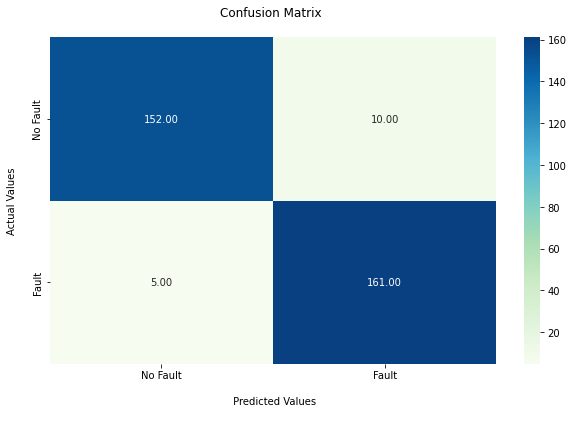

F1 Score:  0.9542491497117607


In [ ]:
for x in bestColumnIndices:
  print(combinedData.columns[x])
print()

x, y = experimentalData.iloc[:, bestColumnIndices], experimentalData.Fault
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)     

model.fit(xTrain, yTrain) 
predictions = model.predict(xTest)

plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(yTest, predictions, labels = [0, 1]), 
               annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(["No Fault", "Fault"])
fx.yaxis.set_ticklabels(["No Fault", "Fault"])
plt.show()

f1 = f1_score(yTest, predictions, average='weighted')
print("F1 Score: ", f1)

## Convert Model To ESP32

In [ ]:
pip install micromlgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32173 sha256=7105661a4b670b8a4d06ca0b348fe51b4cb2ae711ec97b606c555d4b7a7f6d25
  Stored in directory: /root/.cache/pip/wheels/b5/c1/36/9848f822936171a90ec43d0534cb86a58e1dff20c645e22074
Successfully built micromlgen


In [ ]:
from micromlgen import port

if __name__ == '__main__':
    X = xTrain
    y = yTrain
    clf = model.fit(xTrain, yTrain) 
    print(port(clf))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[1] <= 33.5) {
                            if (x[0] <= 37308.0) {
                                if (x[0] <= 28598.0) {
                                    if (x[7] <= 62.5) {
                                        if (x[2] <= 23.5) {
                                            if (x[2] <= 3.0) {
                                                return 0;
                                            }

                                            else {
                                                return 1;
                                            }
                                        }

                                        else {
                    

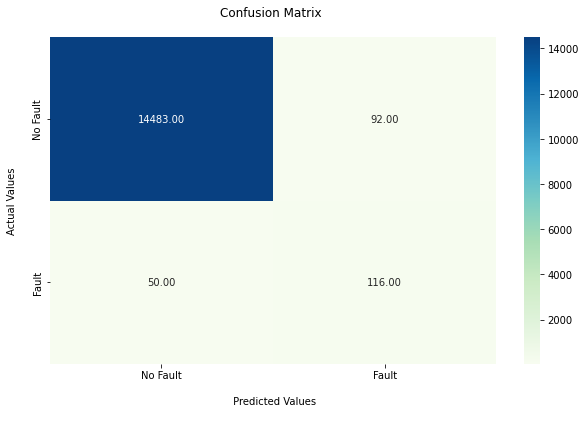

F1 Score:  0.9909009440315546


In [ ]:
experimentalData = combinedData.sample(frac=1)
experimentalData.Fault = experimentalData.Fault.apply(lambda value : 0 if value == 'NF' else 1)

x, y = experimentalData.iloc[:, bestColumnIndices], experimentalData.Fault
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)     

model.fit(xTrain, yTrain) 
predictions = model.predict(xTest)

plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(yTest, predictions, labels = [0, 1]), 
               annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(["No Fault", "Fault"])
fx.yaxis.set_ticklabels(["No Fault", "Fault"])
plt.show()
f1 = f1_score(yTest, predictions, average='weighted')
print("F1 Score: ", f1)

# 5. Data Preparation

In [ ]:
combinedData.Fault.value_counts()

NF    48581
FF      254
EF      174
AF       62
GF       43
MF       20
Name: Fault, dtype: int64

There are far more records of NF (normal condition) than faulty records => imbalanced dataset. We will sample the No Fault dataframe and pick only 300 records.


#5.1. Use of PyCaret 

In [ ]:
from google.colab import files

combinedData.to_csv('fault.csv', index = False)
files.download('fault.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5.1. UNDERSAMPLING

<AxesSubplot:title={'center':'Fault Modes'}, ylabel='Fault'>

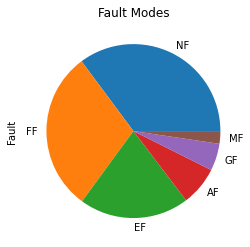

In [ ]:
combinedData = combinedData.sample(frac=1)
NFIndices = combinedData[combinedData.Fault == 'NF'].index.tolist()

np.random.shuffle(NFIndices)
NFIndices = NFIndices[300: len(NFIndices)]
balancedData = combinedData.drop(NFIndices).reset_index()

balancedData.Fault.value_counts().plot.pie(title='Fault Modes')

In [ ]:
balancedData.Fault.value_counts()

NF    300
FF    254
EF    174
AF     62
GF     43
MF     20
Name: Fault, dtype: int64

Seleccionar mejores columnas por resultados de algoritmos geneticos y akaike information criterion

In [ ]:
# balancedData = balancedData.drop(columns = 'index')
balancedData = balancedData[ ['Sys 1 inverter 3 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Spinner temp.', 'Front bearing temp.', 'Rear bearing temp.',
       'Stator temp. 1', 'Nacelle cabinet temp.', 'Rectifier cabinet temp.',
       'Fan inverter cabinet temp.', 'Ambient temp.', 'Fault']]

In [ ]:
balancedData.iloc[:,[2, 8, 11, 12, 13, 19, 24, 26, 28, 29, 35]]

Sys 1 inverter 3 cabinet temp.  Sys 2 inverter 2 cabinet temp.  \
0                                22                              22   
1                                36                              35   
2                                36                              36   
3                                38                              41   
4                                42                              45   
..                              ...                             ...   
848                              27                              27   
849                              32                              32   
850                              29                              29   
851                              33                              33   
852                              34                              37   

     Spinner temp.  Front bearing temp.  Rear bearing temp.  Stator temp. 1  \
0               11                   13                  18              49   
1               23                   26                  31              98   
2               18                   25                  29             100   
3               22                   23                  29              53   
4               22                   24                  30              62   
..             ...                  ...                 ...             ...   
848             15                   20                  25              66   
849             20                   24                  29              72   
850             19                   25                  30              71   
851             19                   25                  31              87   
852             26                   26                  29              42   

     Nacelle cabinet temp.  Rectifier cabinet temp.  \
0                       18                       33   
1                       24                       34   
2                       19                       30   
3                       21                       26   
4                       22                       27   
..                     ...                      ...   
848                     17                       28   
849                     23                       31   
850                     20                       28   
851                     20                       28   
852                     24                       30   

     Fan inverter cabinet temp.  Ambient temp. Fault  
0                            24             10    GF  
1                            36             21    FF  
2                            29             14    EF  
3                            27             12    FF  
4                            29             14    FF  
..                          ...            ...   ...  
848                          26             11    NF  
849                          33             18    AF  
850                          31             15    NF  
851                          31             15    AF  
852                          31             21    NF  

[853 rows x 11 columns]

## 5.2. Preparing Train - Test Data

Necesitamos tener un balance casi perfecto entre el numero de categorias disponibles en los datos de entrenamiento y en los de test

<AxesSubplot:title={'center':'Fault Modes Count of Test Data'}>

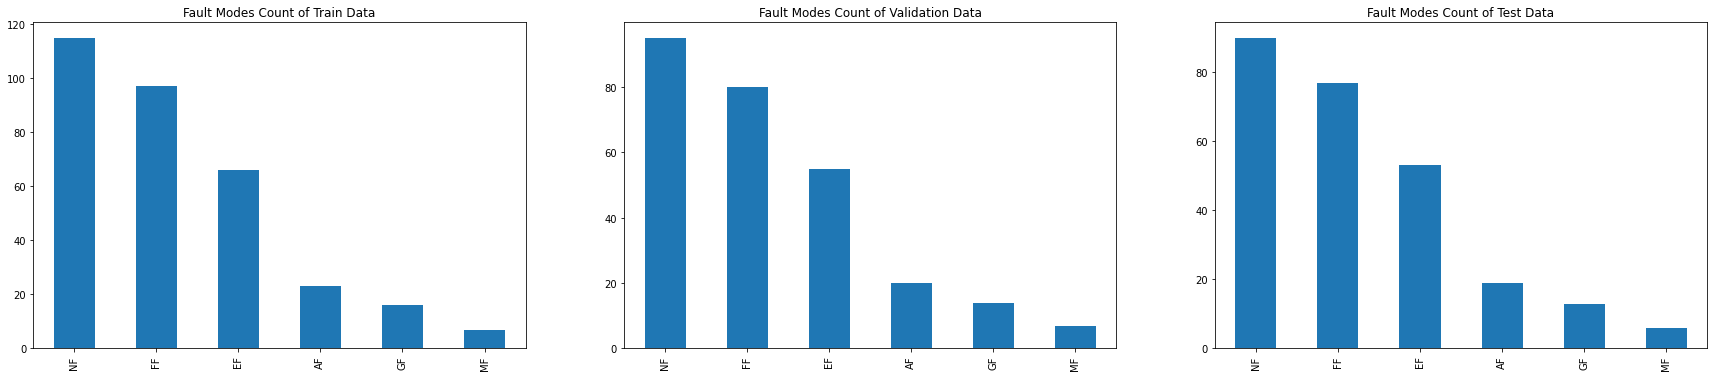

In [ ]:
trainIndices, validationIndices, testIndices = [], [], []

NFIndices = balancedData[balancedData.Fault == 'NF'].index.tolist()
MFIndices = balancedData[balancedData.Fault == 'MF'].index.tolist()
GFIndices = balancedData[balancedData.Fault == 'GF'].index.tolist()
AFIndices = balancedData[balancedData.Fault == 'AF'].index.tolist()
EFIndices = balancedData[balancedData.Fault == 'EF'].index.tolist()
FFIndices = balancedData[balancedData.Fault == 'FF'].index.tolist()

allIndices = [NFIndices, MFIndices, GFIndices, AFIndices, EFIndices, FFIndices]
for typeIndices in allIndices:
  trainTemp, testTemp = np.split(typeIndices, [int(0.7 * len(typeIndices))])
  trainTemp, validationTemp = np.split(trainTemp, [int(0.55 * len(trainTemp))])
  trainIndices += trainTemp.tolist()
  validationIndices += validationTemp.tolist()
  testIndices += testTemp.tolist()

trainData = balancedData.iloc[trainIndices]
validationData = balancedData.iloc[validationIndices]
testData = balancedData.iloc[testIndices]

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

plt.sca(ax[0])
trainData.Fault.value_counts().plot(title='Fault Modes Count of Train Data', kind='bar')
plt.sca(ax[1])
validationData.Fault.value_counts().plot(title='Fault Modes Count of Validation Data', kind='bar')
plt.sca(ax[2])
testData.Fault.value_counts().plot(title='Fault Modes Count of Test Data',  kind='bar')

In [ ]:
trainData.columns

Index(['Sys 1 inverter 3 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Spinner temp.', 'Front bearing temp.', 'Rear bearing temp.',
       'Stator temp. 1', 'Nacelle cabinet temp.', 'Rectifier cabinet temp.',
       'Fan inverter cabinet temp.', 'Ambient temp.', 'Fault'],
      dtype='object')

# 6. Machine Learning Models


In [ ]:
"""
  NF
  FF: feeding fault - fallo de alimentación
  EF: excitation fault - falla de excitación
  AF: air cooling fault - falla de enfriamiento de aire
  GF: generator heating fault - falla de calentamiento del generador
  MF: mains failure fault - falla de falla de red
"""

def encode(value):
  if value == 'NF':
    return 0
  return 1
  """
  if value == 'FF':
    return 1
  if value == 'EF':
    return 2
  if value == 'AF':
    return 3  
  if value == 'GF':
    return 4 
  return 5
  """
trainData['EncodedFault'] = trainData.Fault.apply(lambda value: encode(value))
validationData['EncodedFault'] = validationData.Fault.apply(lambda value: encode(value))
testData['EncodedFault'] = testData.Fault.apply(lambda value: encode(value))
trainData[['Fault', 'EncodedFault']].tail(5)

<ipython-input-21-ecd957370f9a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['EncodedFault'] = trainData.Fault.apply(lambda value: encode(value))
<ipython-input-21-ecd957370f9a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validationData['EncodedFault'] = validationData.Fault.apply(lambda value: encode(value))
<ipython-input-21-ecd957370f9a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Fault  EncodedFault
301    FF             1
305    FF             1
307    FF             1
308    FF             1
313    FF             1

In [ ]:
trainData['EncodedFault'].value_counts()

0    115
1     97
2     66
3     23
4     16
5      7
Name: EncodedFault, dtype: int64

In [ ]:
train_x = trainData.drop(["EncodedFault", "Fault"], axis=1)
train_y = trainData.EncodedFault.reset_index(drop=True)
validation_x = validationData.drop(["EncodedFault", "Fault"], axis=1)
validation_y = validationData.EncodedFault.reset_index(drop=True)
test_x = testData.drop(["EncodedFault", "Fault"], axis=1)
test_y = testData.EncodedFault.reset_index(drop=True)

In [ ]:
test_y.value_counts()

0    90
1    77
2    53
3    19
4    13
5     6
Name: EncodedFault, dtype: int64

In [ ]:
test_x

Sys 1 inverter 3 cabinet temp.  Sys 2 inverter 2 cabinet temp.  \
593                              24                              25   
596                              28                              32   
600                              24                              25   
601                              33                              30   
602                              31                              33   
..                              ...                             ...   
834                              41                              44   
836                              24                              22   
840                              34                              36   
845                              36                              35   
846                              22                              21   

     Spinner temp.  Front bearing temp.  Rear bearing temp.  Stator temp. 1  \
593             14                   20                  28              52   
596             21                   26                  32              58   
600             16                   21                  28              61   
601             17                   22                  29             100   
602             28                   28                  30              48   
..             ...                  ...                 ...             ...   
834             21                   25                  31              73   
836             10                   17                  23              72   
840             19                   23                  28              45   
845             22                   27                  32             109   
846             12                   16                  24              65   

     Nacelle cabinet temp.  Rectifier cabinet temp.  \
593                     15                       31   
596                     23                       34   
600                     19                       31   
601                     18                       29   
602                     25                       34   
..                     ...                      ...   
834                     22                       30   
836                     12                       23   
840                     19                       25   
845                     23                       33   
846                     15                       26   

     Fan inverter cabinet temp.  Ambient temp.  
593                          23              4  
596                          31             13  
600                          29             10  
601                          28             13  
602                          33             19  
..                          ...            ...  
834                          30             15  
836                          23              7  
840                          25             11  
845                          32             18  
846                          25             10  

[258 rows x 10 columns]

### 6.1. Artificial Neural Networks

6.1.1. Find Best Number Of Hidden Layers & Perceptrons Number By Each Hidden Layer With Genetic Algorithms

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
import random
from sklearn.metrics import accuracy_score
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

class OptimizedArtificialNeuralNetwork:
  def __init__(self, numberOfPerceptronsByEachLayer):
    self.model = None
    self.layersUsed = []
    self.numberOfPerceptronsByEachLayer = numberOfPerceptronsByEachLayer
    self.fitness = None

  def initializeLayers(self):
    self.model = Sequential() 
    self.layersUsed.clear()
   
    for x in range(len(self.numberOfPerceptronsByEachLayer)-1):
      currentLayer = None
      if x != 0:
        currentLayer = Dense(self.numberOfPerceptronsByEachLayer[x+1], 
                     kernel_initializer='uniform', 
                     activation=('relu' if x+1 != len(self.numberOfPerceptronsByEachLayer)-1
                                 else 'sigmoid')
                     )
      else:
        currentLayer = Dense(self.numberOfPerceptronsByEachLayer[1], 
                     kernel_initializer='uniform', 
                     input_dim = self.numberOfPerceptronsByEachLayer[0], 
                     activation='relu') 
        
      self.layersUsed.append(currentLayer)
      self.model.add(currentLayer)

    self.model.compile(loss='binary_crossentropy', 
                        optimizer="adam", 
                        metrics=[f1_m])
  
  def setLayersWeights(self, weights):
    for currentLayer in self.layersUsed:
        currentLayer.set_weights([
            weights[x], np.ones(self.numberOfPerceptronsByEachLayer[x+1]) 
                        if x+1 != len(self.numberOfPerceptronsByEachLayer)-1 
                        else np.zeros(self.numberOfPerceptronsByEachLayer[x+1])])
    self.Fitness = None

  def mutationNumberOfPerceptrons(self):
    selection = random.randint(1, len(self.numberOfPerceptronsByEachLayer)-2)
    mut = random.uniform(0, 1)
    if mut <= .15:
      toAddRandom = random.choice([-1, 1])
      if self.numberOfPerceptronsByEachLayer[selection] + toAddRandom > 0:
        self.numberOfPerceptronsByEachLayer[selection] += toAddRandom

  def crossOverNumberOfPerceptrons(self, anotherNeuralNetwork):
    childNumberOfPerceptronsByEachLayer = []

    split = random.randint(0, len(self.numberOfPerceptronsByEachLayer)-1)
    for x in range(0, split+1):
      childNumberOfPerceptronsByEachLayer.append(
          self.numberOfPerceptronsByEachLayer[x])
    for x in range(split+1, len(self.numberOfPerceptronsByEachLayer)):
      childNumberOfPerceptronsByEachLayer.append(
          anotherNeuralNetwork.numberOfPerceptronsByEachLayer[x])

    # only 1 hidden layer
    if len(self.numberOfPerceptronsByEachLayer) == 3:
      bigger = max(self.numberOfPerceptronsByEachLayer[1], 
                   anotherNeuralNetwork.numberOfPerceptronsByEachLayer[1])
      smaller = min(self.numberOfPerceptronsByEachLayer[1], 
                   anotherNeuralNetwork.numberOfPerceptronsByEachLayer[1])
      childNumberOfPerceptronsByEachLayer[1] = random.randint(smaller, bigger)

    return childNumberOfPerceptronsByEachLayer

  def calculateFitness(self, train_x, train_y, validation_x, validation_y):
    if self.model is None:
      pass

    # Stochastic gradient descent is a learning algorithm that has a number of hyperparameters.
    """
    - Stochastic gradient descent is an iterative learning algorithm that uses a training dataset to update a model.
    - The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
    - The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
    """

    batchSize = int(train_x.shape[0]*0.30)
    epochSize = 20
    history = self.model.fit(train_x, train_y, 
                             validation_data=(validation_x, validation_y),
                             batch_size=batchSize,
                             epochs=epochSize)

    self.fitness = history.history['f1_m'][-1]

  def predict(self, test_x, test_y):
    if self.model is None:
      pass
    
    results = self.model.evaluate(test_x, test_y)
    return results

In [ ]:
numberOfInputs = len(train_x.columns)
numberOfHiddenLayers = 7
numberOfDifferentOuputCategories = 1

populationSize = 150
eliteSize = 100 #number of the population that will be kept
numberOfCandidatesForBeParent = 60
generations = 110

#SET INITIAL POPULATION
population = []
for x in range(populationSize):
  hiddenLayersPerceptronsNumber = []
  for y in range(numberOfHiddenLayers):
    hiddenLayersPerceptronsNumber.append(random.randint(5, 128))
  peceptronsNumber = [numberOfInputs] + hiddenLayersPerceptronsNumber + [numberOfDifferentOuputCategories]
  neuralNetwork = OptimizedArtificialNeuralNetwork(peceptronsNumber)
  neuralNetwork.initializeLayers()
  population.append(neuralNetwork)

maxFitness = 0 #tracking max fitness value
bestPerceptronsNumber = []

#EVOLUTION OF POPULATION
for x in range(1, 1+generations):
  print("Generation:", x, sep=' ', end='\n\n\n\n')

  for neuralNetwork in population:
    if neuralNetwork.fitness is None:
      neuralNetwork.calculateFitness(train_x, train_y, 
                                     validation_x, validation_y)

  # Sort anns by fitness
  population = sorted(population, reverse = True, key=lambda x: x.fitness)
  if(maxFitness < population[0].fitness):
    maxFitness = population[0].fitness
    bestPerceptronsNumber.clear()
    for perceptronNumber in population[0].numberOfPerceptronsByEachLayer:
      bestPerceptronsNumber.append(perceptronNumber)

  print("\n\n\n\nUntil", x, "Generation Best Fitness:", maxFitness, sep=' ', end='\n\n\n\n')

  #SET NEXT POPULATION
  nextPopulation = []
  for y in range(eliteSize):
    nextPopulation.append(population[y])

  #CROSSOVER
  endFor = populationSize - eliteSize
  for y in range(endFor): 
    parent1Index = random.randrange(numberOfCandidatesForBeParent)
    parent2Index = random.randrange(numberOfCandidatesForBeParent)

    parent1 = population[parent1Index] 
    parent2 = population[parent2Index] 

    childNumberOfPerceptronsByEachLayer = parent1.crossOverNumberOfPerceptrons(parent2)

    child = OptimizedArtificialNeuralNetwork(childNumberOfPerceptronsByEachLayer)
    child.mutationNumberOfPerceptrons()
    child.initializeLayers()
    
    nextPopulation.append(child)

  population = nextPopulation

print(maxFitness, bestPerceptronsNumber)
optimalANN = OptimizedArtificialNeuralNetwork(bestPerceptronsNumber)
optimalANN.initializeLayers()
optimalANN.predict(test_x, test_y)

Se han truncado las últimas 5000 líneas del flujo de salida.
4/4 [==============================] - 0s 32ms/step - loss: 0.5801 - f1_m: 0.7862 - val_loss: 0.6074 - val_f1_m: 0.6809
Epoch 19/20
4/4 [==============================] - 0s 40ms/step - loss: 0.5789 - f1_m: 0.8088 - val_loss: 0.6011 - val_f1_m: 0.6086
Epoch 20/20
4/4 [==============================] - 0s 22ms/step - loss: 0.5727 - f1_m: 0.7858 - val_loss: 0.6029 - val_f1_m: 0.6275
Epoch 1/20
4/4 [==============================] - 2s 95ms/step - loss: 0.6927 - f1_m: 0.7841 - val_loss: 0.6913 - val_f1_m: 0.6801
Epoch 2/20
4/4 [==============================] - 0s 26ms/step - loss: 0.6897 - f1_m: 0.7935 - val_loss: 0.6850 - val_f1_m: 0.6801
Epoch 3/20
4/4 [==============================] - 0s 25ms/step - loss: 0.6776 - f1_m: 0.7901 - val_loss: 0.6585 - val_f1_m: 0.6801
Epoch 4/20
4/4 [==============================] - 0s 26ms/step - loss: 0.6390 - f1_m: 0.7902 - val_loss: 0.6713 - val_f1_m: 0.6801
Epoch 5/20
4/4 [===============

[0.693155825138092, 0.0]

save the model

In [ ]:
optimalANN.model.save('neuralNetworkModel.h5')

#### 6.1.1 Parameter Optimization With Genetic Algorithms


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
import random
from sklearn.metrics import accuracy_score

class OptimizedArtificialNeuralNetwork:
  def __init__(self):
    self.model = None
    self.layersUsed = []
    self.numberOfPerceptronsByEachLayer = []
    self.fitness = None

  def initializeLayers(self, inputNumber, outputNumber, weights = None):
    self.model = Sequential() 

    inputLayerPerceptronsNumber = inputNumber
    self.numberOfPerceptronsByEachLayer.append(inputLayerPerceptronsNumber)

    hiddenLayer1PerceptronsNumber = 32
    self.numberOfPerceptronsByEachLayer.append(hiddenLayer1PerceptronsNumber)

    hiddenLayer2PerceptronsNumber = 16
    self.numberOfPerceptronsByEachLayer.append(hiddenLayer2PerceptronsNumber)

    hiddenLayer3PerceptronsNumber = 186
    self.numberOfPerceptronsByEachLayer.append(hiddenLayer3PerceptronsNumber)

    outputLayerPerceptronsNumber = outputNumber
    self.numberOfPerceptronsByEachLayer.append(outputLayerPerceptronsNumber)

    leyer1, layer2, layer3, layer4 = None, None, None, None

    if weights is None:
      # input layer of (inputLayerPerceptronsNumber) perceptrons, 
      # 1 hidden layer of (inputLayerPerceptronsNumber) perceptrons
      layer1 = Dense(hiddenLayer1PerceptronsNumber, 
                     kernel_initializer='uniform', 
                     input_dim = inputLayerPerceptronsNumber, 
                     activation='relu') 
      
      layer2 = Dense(hiddenLayer2PerceptronsNumber, 
                     kernel_initializer='uniform', 
                     activation='relu') 

      layer3 = Dense(hiddenLayer3PerceptronsNumber, 
                     kernel_initializer='uniform', 
                     activation='relu')

      # 1 output layer of (outputLayerPerceptronsNumber) perceptrons
      layer4 = Dense(outputLayerPerceptronsNumber, 
                     activation='softmax') 
    else:
      layer1 = Dense(hiddenLayer1PerceptronsNumber, 
                     kernel_initializer='uniform',
                     input_dim = inputLayerPerceptronsNumber, 
                     activation='relu', 
                     weights=[weights[0], np.ones(hiddenLayer1PerceptronsNumber)])
      
      layer2 = Dense(hiddenLayer2PerceptronsNumber, 
                     kernel_initializer='uniform', 
                     activation='relu',
                     weights=[weights[1], np.ones(hiddenLayer2PerceptronsNumber)]) 

      layer3 = Dense(hiddenLayer3PerceptronsNumber, 
                     kernel_initializer='uniform', 
                     activation='relu',
                     weights=[weights[2], np.ones(hiddenLayer3PerceptronsNumber)])
      
      layer4 = Dense(outputLayerPerceptronsNumber, 
                     activation='softmax', 
                     weights=[weights[3], np.zeros(outputLayerPerceptronsNumber)])
    
    self.layersUsed.append(layer1)
    self.layersUsed.append(layer2)
    self.layersUsed.append(layer3)
    self.layersUsed.append(layer4)
    self.model.add(layer1)
    self.model.add(layer2)
    self.model.add(layer3)
    self.model.add(layer4)

    self.model.compile(loss='sparse_categorical_crossentropy', 
                       optimizer="adam", 
                       metrics=['accuracy'])

  def mutation(self, neuralNetworkweights):
    selection = random.randint(0, len(neuralNetworkweights)-1)
    mut = random.uniform(0, 1)
    if mut <= .10:
        neuralNetworkweights[selection] *= random.randint(2, 5)

  def crossOver(self, anotherNeuralNetwork):
    myWeights = []
    anotherNeuralNetworkWeights = []
    childNeuralNetworkWeights = []

    for layer in self.layersUsed:
        myWeights.append(layer.get_weights()[0])

    for layer in anotherNeuralNetwork.layersUsed:
        anotherNeuralNetworkWeights.append(layer.get_weights()[0])

    for x in range(len(myWeights)):
        # Get single point to split the matrix in parents based on # of cols
        split = random.randint(0, np.shape(myWeights[x])[1] - 1)

        # Iterate through after a single point and set the remaing cols to nn_2
        for y in range(split, np.shape(myWeights[x])[1] - 1):
            myWeights[x][:, y] = anotherNeuralNetworkWeights[x][:, y]

        childNeuralNetworkWeights.append(myWeights[x])

    self.mutation(childNeuralNetworkWeights)

    childNeuralNetwork = OptimizedArtificialNeuralNetwork()
    childNeuralNetwork.initializeLayers(self.numberOfPerceptronsByEachLayer[0],
                                        self.numberOfPerceptronsByEachLayer[-1],
                                        childNeuralNetworkWeights)

    return childNeuralNetwork

  def calculateFitness(self, train_x, train_y, validation_x, validation_y):
    if self.model is None:
      pass

    """
    early_stopping = keras.callbacks.EarlyStopping(
        patience=15,
        min_delta=0.001,
        restore_best_weights=True,
    )
    """

    # Stochastic gradient descent is a learning algorithm that has a number of hyperparameters.
    """
    - Stochastic gradient descent is an iterative learning algorithm that uses a training dataset to update a model.
    - The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
    - The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
    """

    batchSize = int(train_x.shape[0]*0.10)
    epochSize = 5
    history = self.model.fit(train_x, train_y, 
                             validation_data=(validation_x, validation_y),
                             batch_size=batchSize,
                             epochs=epochSize)

    self.fitness = history.history['accuracy'][0]

  def predict(self, test_x, test_y):
    if self.model is None:
      pass
    
    results = self.model.evaluate(test_x, test_y)
    return results

In [ ]:
numberOfInputs = len(train_x.columns)
numberOfDifferentOuputCategories = 6

populationSize = 100
eliteSize = 70 #number of the population that will be kept
numberOfCandidatesForBeParent = 30
generations = 20

#SET INITIAL POPULATION
population = []
for x in range(populationSize):
  neuralNetwork = OptimizedArtificialNeuralNetwork()
  neuralNetwork.initializeLayers(numberOfInputs, numberOfDifferentOuputCategories)
  population.append(neuralNetwork)

maxFitness = 0 #tracking max fitness value
bestWeights = []

#EVOLUTION OF POPULATION
for x in range(1, 1+generations):
  print("Generation:", x, sep=' ', end='\n\n')

  for neuralNetwork in population:
    if neuralNetwork.fitness is None:
      neuralNetwork.calculateFitness(train_x, train_y, 
                                     validation_x, validation_y)

  # Sort anns by fitness
  population = sorted(population, reverse = True, key=lambda x: x.fitness)
  if(maxFitness < population[0].fitness):
    maxFitness = population[0].fitness
    bestWeights.clear()
    for layer in population[0].layersUsed:
      bestWeights.append(layer.get_weights()[0])

  print("Until", x, "Generation Best Fitness:", maxFitness, sep=' ', end='\n\n')

  #SET NEXT POPULATION
  nextPopulation = []
  for y in range(eliteSize):
    nextPopulation.append(population[y])

  #CROSSOVER
  endFor = populationSize - eliteSize
  for y in range(endFor): 
    parent1Index = random.randrange(numberOfCandidatesForBeParent)
    parent2Index = random.randrange(numberOfCandidatesForBeParent)

    parent1 = population[parent1Index] 
    parent2 = population[parent2Index] 

    child = parent1.crossOver(parent2)
    nextPopulation.append(child)

  population = nextPopulation

print(maxFitness)
optimalANN = OptimizedArtificialNeuralNetwork()
optimalANN.initializeLayers(numberOfInputs,
                            numberOfDifferentOuputCategories,
                            bestWeights)
optimalANN.predict(test_x, test_y)

Generation: 1

Epoch 1/5
11/11 [==============================] - 1s 26ms/step - loss: 3.3527 - accuracy: 0.2963 - val_loss: 2.0649 - val_accuracy: 0.2066
Epoch 2/5
11/11 [==============================] - 0s 7ms/step - loss: 1.6692 - accuracy: 0.2685 - val_loss: 1.5852 - val_accuracy: 0.3506
Epoch 3/5
11/11 [==============================] - 0s 8ms/step - loss: 1.5139 - accuracy: 0.2840 - val_loss: 1.5273 - val_accuracy: 0.3506
Epoch 4/5
11/11 [==============================] - 0s 8ms/step - loss: 1.4978 - accuracy: 0.3302 - val_loss: 1.5003 - val_accuracy: 0.3911
Epoch 5/5
11/11 [==============================] - 0s 8ms/step - loss: 1.4401 - accuracy: 0.3488 - val_loss: 1.4488 - val_accuracy: 0.3506
Epoch 1/5
11/11 [==============================] - 1s 26ms/step - loss: 3.9438 - accuracy: 0.2438 - val_loss: 2.8919 - val_accuracy: 0.2989
Epoch 2/5
11/11 [==============================] - 0s 9ms/step - loss: 2.0434 - accuracy: 0.3056 - val_loss: 1.6884 - val_accuracy: 0.1882
Epoch 3/5


KeyboardInterrupt: ignored

In [ ]:
print(maxFitness)